In [1]:
import glob
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import rocks
rocks.set_log_level("error")
import time as t

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import angular_separation

import seaborn as sns
sns.set_context('poster')

In [2]:
# Local Configuration
bft_file = '/home/peloton/Downloads/ssoBFT-latest.parquet'
# data_fink = '/data/fink/tutorials/sso/spins/'
data_fink = './'

# To choose the definitSSHADE / PSuion of sets
# gold_silver_choice = 'julien'
gold_silver_choice = 'benoit'

In [3]:
# Simple BFT reading function & Column selection
def read_bft(path):
    cols = [
        'sso_number', 
        'orbital_elements.semi_major_axis.value', 
        'orbital_elements.eccentricity.value', 
        'orbital_elements.inclination.value', 
        'orbital_elements.node_longitude.value',
        'proper_elements.proper_semi_major_axis.value',
        'proper_elements.proper_eccentricity.value',
        'proper_elements.proper_inclination.value',
        'proper_elements.proper_sine_inclination.value',
        'family.family_number', 'family.family_name',
        'absolute_magnitude.value', 
        'diameter.value', 
        'mass.value', 
        'taxonomy.class', 
        'taxonomy.complex', 
        'phase_functions.Generic/Johnson.V.H.value',
        'phase_functions.Generic/Johnson.V.G1.value',
        'phase_functions.Generic/Johnson.V.G2.value',
        'sso_class'
    ]
    
    for ks in ['1','2','3','4']:
        cols.append(f'spins.{ks}.RA0.value')
        cols.append(f'spins.{ks}.DEC0.value')
        cols.append(f'spins.{ks}.long.value')
        cols.append(f'spins.{ks}.lat.value')
        cols.append(f'spins.{ks}.obliquity')
    
    bft = pd.read_parquet(path, columns=cols)
    
    return bft

In [4]:
# G12 line in G1G2 space
def G12_to_G1G2(g12):

    G1_a, G2_a = 0.0, 0.53513350
    G1_b, G2_b = 0.84293649, -0.53513350

    G1 = G1_a + g12 * G1_b
    G2 = G2_a + g12 * G2_b

    return G1, G2


In [5]:
# Read FINK results
# raw = pd.read_parquet(f'{data_fink}data/sso_bft_50_inf_hg1g2spins.parquet')
raw = pd.read_parquet(f'{data_fink}data/sso_bft_50_inf_hybrid.parquet')

names_numbers = rocks.identify(raw.ssnamenr)
raw['ssnamenr'] = [str(name_number[1]) for name_number in names_numbers]

print(len(raw))

# Merge with BFT
pdf_bft = read_bft(bft_file)
pdf_bft = pdf_bft.rename(columns={'sso_number': 'ssnamenr'})
mask = pdf_bft['ssnamenr'].apply(lambda x: x == x)
pdf_bft = pdf_bft[mask]
pdf_bft['ssnamenr'] = pdf_bft['ssnamenr'].apply(lambda x: str(int(x)))

data = raw.merge(pdf_bft, on='ssnamenr')
n_object_input = len(data)
print(n_object_input)

ERROR    [rocks] Could not find match for id 2012 UA00.

ERROR    [rocks] Could not find match for id 2003 NM03.

ERROR    [rocks] Could not find match for id 2020 PC05.

ERROR    [rocks] Could not find match for id 2011 YQ04.

ERROR    [rocks] Could not find match for id 2015 WV01.

ERROR    [rocks] Could not find match for id 2007 NX01.

ERROR    [rocks] Could not find match for id 2016 QP01.

ERROR    [rocks] Could not find match for id 2016 VM04.

ERROR    [rocks] Could not find match for id 2008 TE07.

ERROR    [rocks] Could not find match for id 2018 KG02.

ERROR    [rocks] Could not find match for id 2007 LX00.

ERROR    [rocks] Could not find match for id 2006 QB03.

ERROR    [rocks] Could not find match for id 2016 OK00.

ERROR    [rocks] Could not find match for id 2021 LK02.

ERROR    [rocks] Could not find match for id 2011 LZ05.

ERROR    [rocks] Could not find match for id 2020 KU04.

ERROR    [rocks] Could not find match for id 2018 XV05.

ERROR    [rocks] Could not find match for id 2017 YH03.

ERROR    [rocks] Could not find match for id 2003 UR00.

ERROR    [rocks] Could not find match for id 2012 LV07.

ERROR    [rocks] Could not find match for id 2010 LS00.

ERROR    [rocks] Could not find match for id 2010 WQ07.

ERROR    [rocks] Could not find match for id 2007 AS01.

ERROR    [rocks] Could not find match for id 2020 KJ06.

ERROR    [rocks] Could not find match for id 1998 UQ01.

ERROR    [rocks] Could not find match for id 2013 PY06.

ERROR    [rocks] Could not find match for id 2002 NS07.

ERROR    [rocks] Could not find match for id 2003 VA03.

ERROR    [rocks] Could not find match for id 2009 CD04.

ERROR    [rocks] Could not find match for id 2015 JO05.

ERROR    [rocks] Could not find match for id 2016 OQ02.

ERROR    [rocks] Could not find match for id 2001 YU03.

ERROR    [rocks] Could not find match for id 28P.

ERROR    [rocks] Could not find match for id 2011 AJ05.

ERROR    [rocks] Could not find match for id 2020 VF01.

ERROR    [rocks] Could not find match for id 162P.

ERROR    [rocks] Could not find match for id 2014 KL05.

ERROR    [rocks] Could not find match for id 2016 VW01.

ERROR    [rocks] Could not find match for id 2018 LM04.

ERROR    [rocks] Could not find match for id 2019 AQ03.

ERROR    [rocks] Could not find match for id 2013 WJ00.

ERROR    [rocks] Could not find match for id 2003 YM01.

ERROR    [rocks] Could not find match for id 2004 MJ03.

ERROR    [rocks] Could not find match for id 2007 OR01.

ERROR    [rocks] Could not find match for id 2020 AV02.

ERROR    [rocks] Could not find match for id 2017 RM00.

ERROR    [rocks] Could not find match for id 2020 OW03.

ERROR    [rocks] Could not find match for id 2007 UT07.

ERROR    [rocks] Could not find match for id 2020 JQ00.

ERROR    [rocks] Could not find match for id 2002 TA09.

ERROR    [rocks] Could not find match for id 2017 LO01.

ERROR    [rocks] Could not find match for id 2008 YF02.

ERROR    [rocks] Could not find match for id 2020 ML03.

ERROR    [rocks] Could not find match for id 2014 RP00.

ERROR    [rocks] Could not find match for id 2003 VD01.

ERROR    [rocks] Could not find match for id 2021 NX07.

ERROR    [rocks] Could not find match for id 2002 XZ04.

ERROR    [rocks] Could not find match for id 2004 XM00.

ERROR    [rocks] Could not find match for id 2001 RD02.

ERROR    [rocks] Could not find match for id 2014 RH00.

ERROR    [rocks] Could not find match for id 2020 OL03.

ERROR    [rocks] Could not find match for id 2016 XB07.

ERROR    [rocks] Could not find match for id 2009 PA09.

ERROR    [rocks] Could not find match for id 1999 UK05.

ERROR    [rocks] Could not find match for id 2020 NA00.

ERROR    [rocks] Could not find match for id 2020 FW03.

ERROR    [rocks] Could not find match for id 2015 MO01.

ERROR    [rocks] Could not find match for id 2002 GZ08.

ERROR    [rocks] Could not find match for id 2016 XE01.

ERROR    [rocks] Could not find match for id 2020 PD01.

ERROR    [rocks] Could not find match for id 2003 RK07.

ERROR    [rocks] Could not find match for id 2001 BO02.

ERROR    [rocks] Could not find match for id 2007 TG08.

ERROR    [rocks] Could not find match for id 2016 WQ05.

ERROR    [rocks] Could not find match for id 2013 XE04.

ERROR    [rocks] Could not find match for id 2020 KZ05.

ERROR    [rocks] Could not find match for id 2009 CC03.

104242
104005


In [6]:
data.columns

Index(['ssnamenr', 'nmeasurements', 'ndays', 'params',
       'orbital_elements.semi_major_axis.value',
       'orbital_elements.eccentricity.value',
       'orbital_elements.inclination.value',
       'orbital_elements.node_longitude.value',
       'proper_elements.proper_semi_major_axis.value',
       'proper_elements.proper_eccentricity.value',
       'proper_elements.proper_inclination.value',
       'proper_elements.proper_sine_inclination.value', 'family.family_number',
       'family.family_name', 'absolute_magnitude.value', 'diameter.value',
       'mass.value', 'taxonomy.class', 'taxonomy.complex',
       'phase_functions.Generic/Johnson.V.H.value',
       'phase_functions.Generic/Johnson.V.G1.value',
       'phase_functions.Generic/Johnson.V.G2.value', 'sso_class',
       'spins.1.RA0.value', 'spins.1.DEC0.value', 'spins.1.long.value',
       'spins.1.lat.value', 'spins.1.obliquity', 'spins.2.RA0.value',
       'spins.2.DEC0.value', 'spins.2.long.value', 'spins.2.lat.value',


In [7]:
data.head(2)

ssnamenr  nmeasurements        ndays  \
0    14190            141  1019.659491   
1    47488            195   699.865614   

                                              params  \
0  {'G1_1': 0.6863390803337097, 'G1_2': 0.7474648...   
1  {'G1_1': 0.15653248131275177, 'G1_2': 4.720386...   

   orbital_elements.semi_major_axis.value  \
0                                3.022044   
1                                2.355817   

   orbital_elements.eccentricity.value  orbital_elements.inclination.value  \
0                             0.088771                            4.589980   
1                             0.118131                            6.914118   

   orbital_elements.node_longitude.value  \
0                              91.927477   
1                             317.785856   

   proper_elements.proper_semi_major_axis.value  \
0                                      3.025971   
1                                      2.356040   

   proper_elements.proper_eccentricity.value  ...  spins.3.RA0.value  \
0                                   0.104033  ...                NaN   
1                                   0.141914  ...                NaN   

   spins.3.DEC0.value  spins.3.long.value spins.3.lat.value  \
0                 NaN                 NaN               NaN   
1                 NaN                 NaN               NaN   

   spins.3.obliquity  spins.4.RA0.value  spins.4.DEC0.value  \
0                NaN                NaN                 NaN   
1                NaN                NaN                 NaN   

  spins.4.long.value spins.4.lat.value  spins.4.obliquity  
0                NaN               NaN                NaN  
1                NaN               NaN                NaN  

[2 rows x 43 columns]

In [8]:
data['params'].values[0].keys()

dict_keys(['G1_1', 'G1_2', 'G2_1', 'G2_2', 'H_1', 'H_2', 'R', 'alpha0', 'chi2red', 'delta0', 'errG1_1', 'errG1_2', 'errG2_1', 'errG2_2', 'errH_1', 'errH_2', 'errR', 'erralpha0', 'errdelta0', 'fit', 'maxphase', 'minphase', 'noppositions', 'rms', 'status'])

## Least square fitting

Let's examine the quality of the fit. We have two...

In [9]:
# Code for error `fit`:
# - 0: success
# - 1: bad_vals
# - 2: MiriadeFail
# - 3: RunTimError
# - 4: LinalgError
data['fitQ'] = data['params'].apply(lambda x: int(x['fit']))
data.groupby('fitQ').count()[['ssnamenr']]

ssnamenr
fitQ          
0       103736
2           54
4          215

For most of the objects, the fit did not crash. 219 had a degenerate jacobian (error code 4), and 54 could not be processed by ephemcc4 (why? I need to inspect). Let's now look at the actual fit quality:

In [10]:
# The reason for algorithm termination:
# Code for quality result `status`:
# -2: failure
# -1 : improper input parameters status returned from MINPACK.
# 0 : the maximum number of function evaluations is exceeded.
# 1 : gtol termination condition is satisfied.
# 2 : ftol termination condition is satisfied.
# 3 : xtol termination condition is satisfied.
# 4 : Both ftol and xtol termination conditions are satisfied.


data['status'] = data['params'].apply(lambda x: int(x['status']))
data.groupby('status').count()[['ssnamenr']]

ssnamenr
status          
-2            54
 0           865
 1             9
 2         75054
 3         19774
 4          8249

In [11]:
f1 = data['fitQ'] == 0

# Only status 2 and 4 are trusted convergence
f2 = data['status'].apply(lambda x: x in [4, 2])

data = data[f1 & f2]

In [12]:
# Phase function

# ZTF filters 1: g, 2: r
filters = {'1': 'g', '2': 'r'}

for filt in filters.keys():
    data['H_{}'.format(filters[filt])] = data['params'].apply(lambda x: x['H_{}'.format(filt)]).values
    data['dH_{}'.format(filters[filt])] = data['params'].apply(lambda x: x['errH_{}'.format(filt)]).values
    data['G1_{}'.format(filters[filt])] = data['params'].apply(lambda x: x['G1_{}'.format(filt)]).values
    data['dG1_{}'.format(filters[filt])] = data['params'].apply(lambda x: x['errG1_{}'.format(filt)]).values
    data['G2_{}'.format(filters[filt])] = data['params'].apply(lambda x: x['G2_{}'.format(filt)]).values
    data['dG2_{}'.format(filters[filt])] = data['params'].apply(lambda x: x['errG2_{}'.format(filt)]).values

data['minphase'] = np.rad2deg(data['params'].apply(lambda x: x['minphase']).values)
data['maxphase'] = np.rad2deg(data['params'].apply(lambda x: x['maxphase']).values)
data['rms'] = data['params'].apply(lambda x: x['rms']).values

# Oblateness
data['R'] = data['params'].apply(lambda x: x['R']).values
data['dR'] = data['params'].apply(lambda x: x['errR']).values

# Coordinates: RA/Dec
data['RA0'] = np.rad2deg(data['params'].apply(lambda x: x['alpha0']).values)
data['dRA0'] = np.rad2deg(data['params'].apply(lambda x: x['erralpha0']).values)
        
data['DEC0'] = np.rad2deg(data['params'].apply(lambda x: x['delta0']).values)
data['dDEC0'] = np.rad2deg(data['params'].apply(lambda x: x['errdelta0']).values)

data['dSpin'] = np.sqrt( data['dRA0']**2 + data['dDEC0']**2 )

# Remove solutions above 90 deg of latitude
cond = data.DEC0 > 90
data.loc[cond,'DEC0'] = 90
cond = data.DEC0 < -90
data.loc[cond,'DEC0'] = -90

# Spin coordinates: long/lat
# Define angle for astropy
ra = data.RA0*u.degree
dec = data.DEC0*u.degree

# Convert to EC and store in the pandas DataFrame
coords = SkyCoord(ra=ra, dec=dec, distance=200*u.parsec, frame='hcrs')
data['lon'] = coords.heliocentricmeanecliptic.lon.value
data['lat'] = coords.heliocentricmeanecliptic.lat.value

# Obliquity of the spin
data['lon_orbit'] = data['orbital_elements.node_longitude.value'] - 90
data['lat_orbit'] = 90. - data['orbital_elements.inclination.value']
data['obliquity'] = data[['lon','lat', 'lon_orbit','lat_orbit']].apply(
    lambda x: np.degrees(angular_separation( np.radians(x[0]), np.radians(x[1]), np.radians(x[2]), np.radians(x[3]) )) , axis=1
)
data['obliquity_alt'] = data[['lon','lat', 'lon_orbit','lat_orbit']].apply(
    lambda x: np.degrees(angular_separation( np.radians(x[0]-180), np.radians(-x[1]), np.radians(x[2]), np.radians(x[3]) )) , axis=1
)

# Convergence chi2
data['chi2red'] = data['params'].apply(lambda x: x['chi2red']).values
data['rms'] = data['params'].apply(lambda x: x['rms']).values

# Number of oppositions per object
data['noppositions'] = data['params'].apply(lambda x: x['noppositions']).values

# Set flavors
# Bronze
mask = data['chi2red'].apply(lambda x: x == x)
for filt in filters.values():
        mask *= (data['G1_{}'.format(filt)] + data['G2_{}'.format(filt)] <= 1)
data.loc[mask, 'flavor'] = 'bronze'

## Definition of Silver/Gold by Julien
if gold_silver_choice=='julien':
    # Silver
    mask = data['chi2red'] < 20
    mask *= data['alpha0']/data['dRA0'] >= 1
    mask *= np.abs(data['DEC0']/data['dDEC0']) >= 1
    mask *= data['R']/data['dR'] >= 1
    for filt in filters.values():
        mask *= (data['G1_{}'.format(filt)] + data['G2_{}'.format(filt)] <= 1)
    data.loc[mask,'flavor'] = 'silver'

    # Gold
    mask = (data['chi2red'] < 1.5) * (data['chi2red'] > 0.5)
    mask *= data['RA0']/data['dRA0'] >= 3
    mask *= np.abs(data['DEC0']/data['dDEC0']) >= 3
    mask *= data['R']/data['dR'] >= 3
    for filt in filters.values():
        mask *= (data['G1_{}'.format(filt)] + data['G2_{}'.format(filt)] <= 1)
    data.loc[mask,'flavor'] = 'gold'

## Definition of Silver/Gold by Benoit
if gold_silver_choice=='benoit':
    # Silver
    mask = data['dRA0'] < 30
    mask *= data['dDEC0'] < 30
    for filt in filters.values():
        mask *= (data['G1_{}'.format(filt)]>=0.001)
        mask *= (data['G1_{}'.format(filt)] + data['G2_{}'.format(filt)] <= 1)
    data.loc[mask,'flavor'] = 'silver'

    # Gold
    mask = data['dRA0'] < 10
    mask *= data['dDEC0'] < 10
    for filt in filters.values():
        mask *= (data['G1_{}'.format(filt)]>=0.001)
        mask *= (data['G1_{}'.format(filt)] + data['G2_{}'.format(filt)] <= 1)
    data.loc[mask,'flavor'] = 'gold'

In [13]:
count = 0
for flavor in ['gold', 'silver', 'bronze']:

    cond = data['flavor'] == flavor
    print('Number of observations for {:7s}: {:,}/{:,}'.format(flavor, len(data[cond]), len(data)))
    count += len(data[cond])
print('{:,} with spins'.format(count))
print('{:,} rejected'.format(len(data) - count))

Number of observations for gold   : 5,435/83,094
Number of observations for silver : 12,755/83,094
Number of observations for bronze : 43,158/83,094
61,348 with spins
21,746 rejected


In [14]:
print('Total: {:,}'.format(n_object_input))

print('With fit: {:,}'.format(len(data)))

mask = (data['G1_g'] + data['G2_g'] <= 1)
mask *= (data['G1_r'] + data['G2_r'] <= 1)

print('Physical: {:,}'.format(len(data[mask])))

Total: 104,005
With fit: 83,094
Physical: 61,348


### Extract SSO name

In [15]:
t0 = t.time()
names_numbers = rocks.identify(data.ssnamenr)

# Add numbers and names to data
data["name"] = [name_number[0] for name_number in names_numbers]
data["number"] = [name_number[1] for name_number in names_numbers]

t1 = t.time()
print(f'Time for identification: {t1-t0:.1f}s')

Time for identification: 3.1s


In [16]:
data.head(2)

ssnamenr  nmeasurements        ndays  \
0    14190            141  1019.659491   
1    47488            195   699.865614   

                                              params  \
0  {'G1_1': 0.6863390803337097, 'G1_2': 0.7474648...   
1  {'G1_1': 0.15653248131275177, 'G1_2': 4.720386...   

   orbital_elements.semi_major_axis.value  \
0                                3.022044   
1                                2.355817   

   orbital_elements.eccentricity.value  orbital_elements.inclination.value  \
0                             0.088771                            4.589980   
1                             0.118131                            6.914118   

   orbital_elements.node_longitude.value  \
0                              91.927477   
1                             317.785856   

   proper_elements.proper_semi_major_axis.value  \
0                                      3.025971   
1                                      2.356040   

   proper_elements.proper_eccentricity.value  ...        lat   lon_orbit  \
0                                   0.104033  ... -59.309010    1.927477   
1                                   0.141914  ...  65.605765  227.785856   

   lat_orbit   obliquity  obliquity_alt   chi2red  noppositions  flavor  \
0  85.410020  150.436012      29.563988  9.583546           3.0  bronze   
1  83.085882   22.686603     157.313397  1.283283           2.0  bronze   

        name  number  
0     Soldan   14190  
1  2000 AZ32   47488  

[2 rows x 78 columns]

## Basic statistics

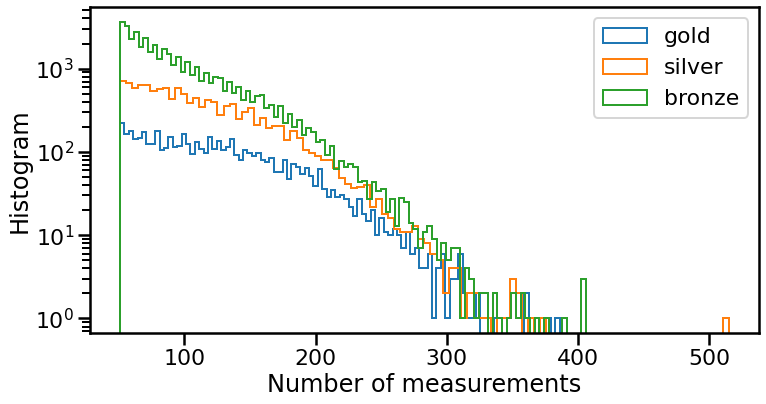

In [17]:
fig = plt.figure(figsize=(12, 6))

for flavor in ['gold', 'silver', 'bronze']:

    cond = data['flavor'] == flavor
    plt.hist(data.loc[cond, 'nmeasurements'], bins=100, histtype='step', label=flavor);
plt.xlabel('Number of measurements')
plt.ylabel('Histogram')
plt.yscale('log')
plt.legend();
fig.savefig(f'{data_fink}plots/nmeasurements.png', facecolor='white', dpi=150)

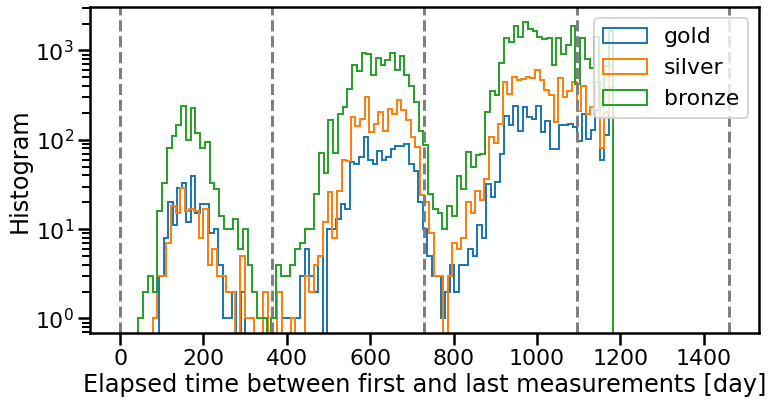

In [18]:
fig = plt.figure(figsize=(12, 6))

for flavor in ['gold', 'silver', 'bronze']:

    cond = data['flavor'] == flavor
    plt.hist(data.loc[cond, 'ndays'], bins=100, histtype='step', label=flavor);
plt.xlabel('Elapsed time between first and last measurements [day]')
plt.ylabel('Histogram');
plt.legend()
for i in range(5):
    plt.axvline(365*i, ls='--', color='grey')
plt.yscale('log')
fig.savefig(f'{data_fink}plots/time_lapse.png', facecolor='white', dpi=150)

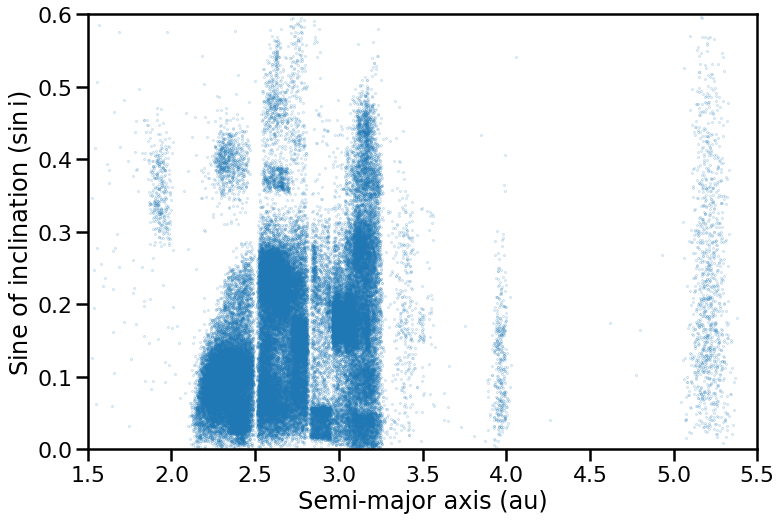

In [19]:
Is = data['orbital_elements.inclination.value']
As = data['orbital_elements.semi_major_axis.value']
Es = data['orbital_elements.eccentricity.value']

fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(As, np.sin(np.radians(Is)), marker='.', alpha=0.4, s=1);


ax.set_xlim(1.5,5.5)
ax.set_ylim(0, 0.6)
ax.set_xlabel('Semi-major axis (au)')
ax.set_ylabel(r'Sine of inclination ($\sin$i)')

fig.savefig(f'{data_fink}plots/types.png', facecolor='white', dpi=150)

In [20]:
data['sso_class'].value_counts()

MB>Middle             30718
MB>Outer              26089
MB>Inner              22821
Trojan                 1143
Phocaea                 661
MB>Cybele               440
MB>Hilda                396
Hungaria                330
Mars-Crosser            303
NEA>Apollo               92
NEA>Amor                 62
NEA>Aten                 16
Centaur                   6
KBO>SDO                   6
KBO>Resonant>3:2          4
KBO>Classical>Main        3
KBO>Resonant>7:4          2
KBO>Detached              1
NEA>Atira                 1
Name: sso_class, dtype: int64

## Phase curve

### Phase range - Phase Min - Phase Max

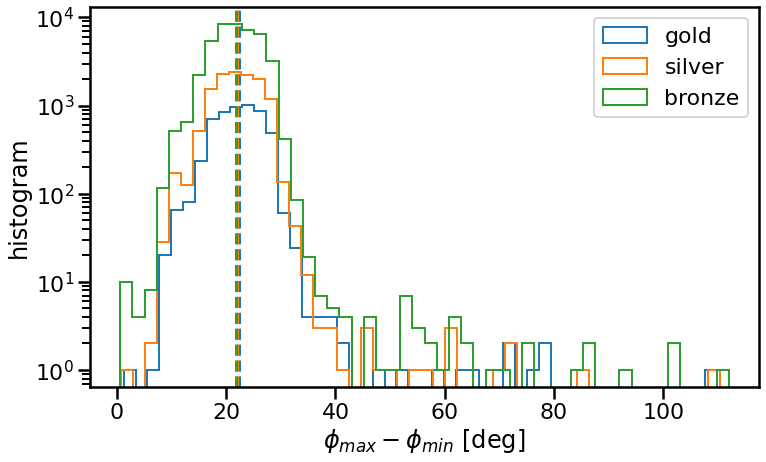

In [21]:
fig = plt.figure(figsize=(12, 7))

for index, flavor in enumerate(['gold', 'silver', 'bronze']):
    cond = data.flavor == flavor
    
    d_ = data.loc[cond,'maxphase'] - data.loc[cond,'minphase']

    plt.hist(d_, bins=50, histtype='step', density=False, label=flavor, color='C{}'.format(index))
    plt.axvline(np.mean(d_), ls='--', lw=3, color='C{}'.format(index))
    plt.xlabel(r'$\phi_{max} - \phi_{min}$ [deg]')
    plt.ylabel('histogram')
    plt.legend()
plt.yscale('log')
plt.show()
fig.savefig(f'{data_fink}plots/phase_amplitude.png', facecolor='white', dpi=150)

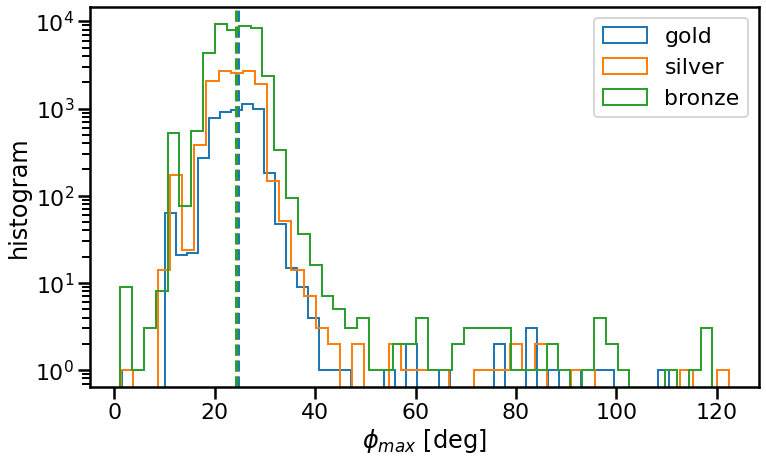

In [22]:
fig = plt.figure(figsize=(12, 7))

for index, flavor in enumerate(['gold', 'silver', 'bronze']):
    cond = data.flavor == flavor
    
    d_ = data.loc[cond,'maxphase'] 

    plt.hist(d_, bins=50, histtype='step', density=False, label=flavor, color='C{}'.format(index))
    plt.axvline(np.mean(d_), ls='--', lw=3, color='C{}'.format(index))
    plt.xlabel(r'$\phi_{max}$ [deg]')
    plt.ylabel('histogram')
    plt.legend()
plt.yscale('log')
plt.show()
fig.savefig(f'{data_fink}plots/phase_max.png', facecolor='white', dpi=150)

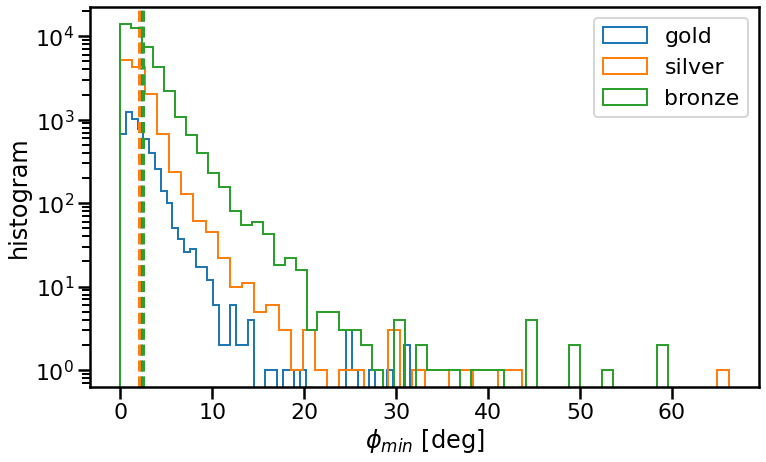

In [23]:
fig = plt.figure(figsize=(12, 7))

for index, flavor in enumerate(['gold', 'silver', 'bronze']):
    cond = data.flavor == flavor
    
    d_ = data.loc[cond,'minphase']

    plt.hist(d_, bins=50, histtype='step', density=False, label=flavor, color='C{}'.format(index))
    plt.axvline(np.mean(d_), ls='--', lw=3, color='C{}'.format(index))
    plt.xlabel(r'$\phi_{min}$ [deg]')
    plt.ylabel('histogram')
    plt.legend()
plt.yscale('log')
plt.show()
fig.savefig(f'{data_fink}plots/phase_min.png', facecolor='white', dpi=150)

### H - G1 - G2

/home/peloton/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


G1 at 0 or 1 boundary: 35.0%
G2 at 0 or 1 boundary: 10.0%


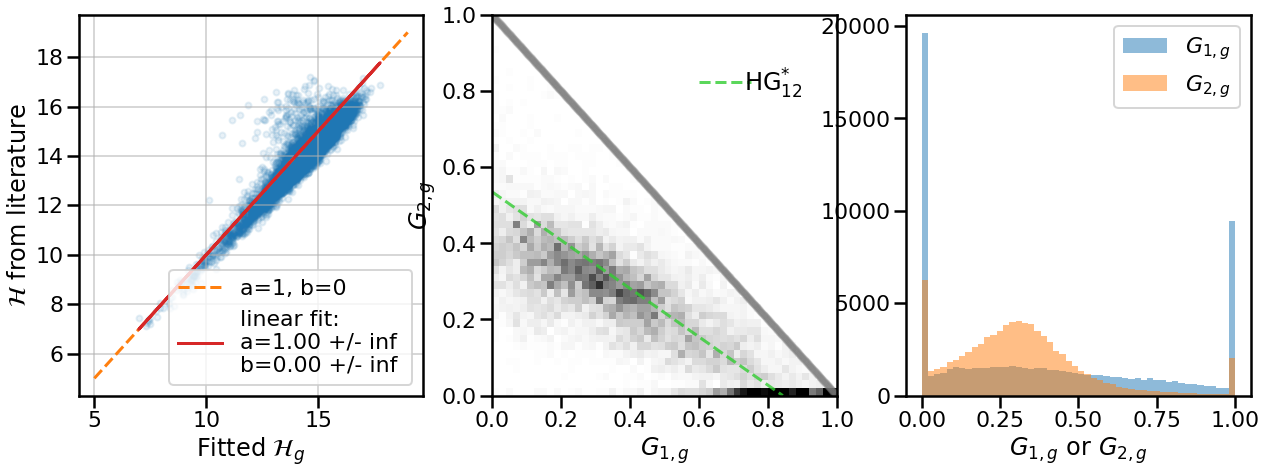

G1 at 0 or 1 boundary: 31.0%
G2 at 0 or 1 boundary: 8.4%


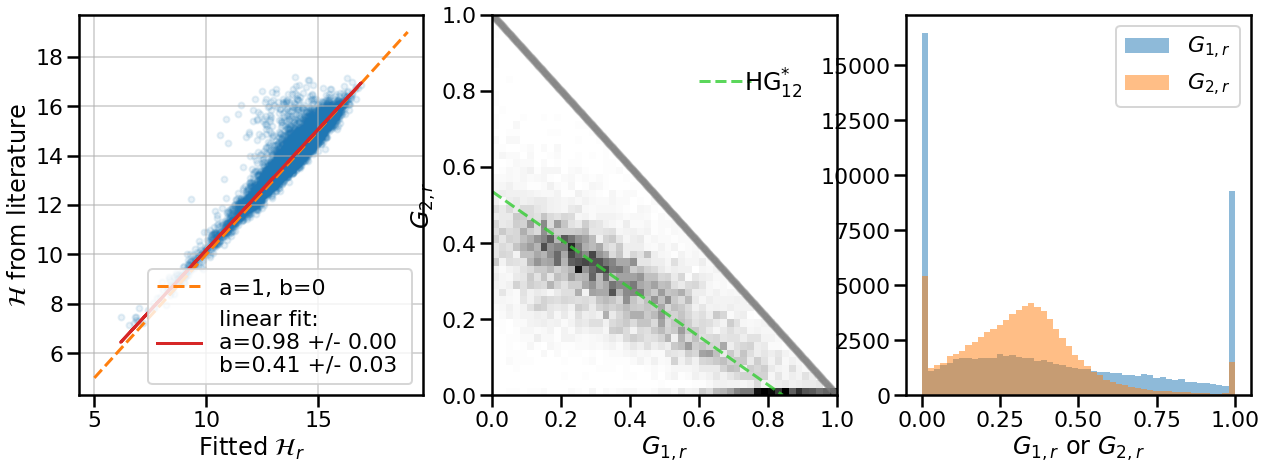

In [24]:
from scipy.optimize import curve_fit

def linear(x, a, b):
    return a * x + b

yaxis = data['phase_functions.Generic/Johnson.V.H.value'].values
mask = yaxis == yaxis
mask *= data['flavor'] == 'silver'
yaxis = yaxis[mask]

for filt in filters.values():
    xaxis = data['H_{}'.format(filt)].values[mask]
    err = data['dH_{}'.format(filt)].values[mask]

    popt, pcov = curve_fit(linear, xaxis, yaxis, sigma=err, p0=[1.0, 0.0])
    perr = np.sqrt(np.diagonal(pcov))


    fig, ax = plt.subplots(1, 3, figsize=(21, 7))
    ax[0].scatter(
        xaxis,
        yaxis,
        marker='.',
        alpha=0.1
    )
    ax[0].plot(
        range(5, 20), 
        range(5, 20), 
        color='C1', ls='--', label='a=1, b=0'
    )
    ax[0].plot(
        xaxis, 
        linear(xaxis, *popt), 
        label='linear fit: \na={:.2f} +/- {:.2f} \nb={:.2f} +/- {:.2f}'.format(popt[0], perr[0], popt[1], perr[1]),
        color='C3',
        lw=3
    )
    ax[0].set_xlabel('Fitted $\mathcal{{H}}_{}$'.format(filt))
    ax[0].set_ylabel('$\mathcal{H}$ from literature')
    ax[0].legend()
    ax[0].grid(alpha=0.5)

    def triangle(x, r):
        return r - x

    # Scatter ----
    # ax[1].scatter(
    #     data.loc[mask,'G1'], 
    #     data.loc[mask,'G2'], 
    #     alpha=0.05, 
    #     marker='.',
    #     label='Fitted'
    # )
    # ax[1].scatter(
    #     data.loc[mask,'phase_functions.Generic/Johnson.V.G1.value'], 
    #     data.loc[mask,'phase_functions.Generic/Johnson.V.G2.value'], 
    #     alpha=0.05, 
    #     marker='.',
    #     label='Literature'
    # )

    # histogram ----
    ax[1].hist2d(
        data.loc[mask,'G1_{}'.format(filt)], 
        data.loc[mask,'G2_{}'.format(filt)], 
        # alpha=0.05, 
        # marker='.',
        range=[ [0,1],[0,1]], 
        bins=50,
        cmap='Greys',
        vmin=0, vmax=50, 
        label='Fitted'
    )


    g12 = np.linspace(0, 1, num=10)
    G1, G2 = G12_to_G1G2(g12)
    ax[1].plot(G1, G2, linestyle="--", color="limegreen", alpha=0.8)
    ax[1].text(0.9, 0.8, "HG$_{12}^{*}$", ha="right")
    ax[1].plot(
        [0.6, 0.75],
        [0.825, 0.825],
        linestyle="--",
        color="limegreen",
        alpha=0.8,
    )


    xr = np.arange(0, 1, 0.001)
    ax[1].scatter(xr, triangle(xr, 1.), color='grey', marker='.', alpha=0.1)
    ax[1].set_xlim(0, 1)
    ax[1].set_ylim(0, 1)
    ax[1].set_xlabel('$G_{{1, {}}}$'.format(filt))
    ax[1].set_ylabel('$G_{{2, {}}}$'.format(filt))
    # ax[1].legend()



    binG = 50
    ng1, hg1, _ = ax[2].hist( data['G1_{}'.format(filt)], range=[0,1], bins=binG, alpha=0.5, label='$G_{{1, {}}}$'.format(filt))
    ng2, hg2, _ = ax[2].hist( data['G2_{}'.format(filt)], range=[0,1], bins=binG, alpha=0.5, label='$G_{{2, {}}}$'.format(filt))
    ax[2].set_xlabel('$G_{{1, {}}}$ or $G_{{2, {}}}$'.format(filt, filt))
    ax[2].legend()

    print(f'G1 at 0 or 1 boundary: {100*(ng1[0]+ng1[-1]) / np.sum(ng1):.1f}%' )
    print(f'G2 at 0 or 1 boundary: {100*(ng2[0]+ng2[-1]) / np.sum(ng2):.1f}%' )

    fig.savefig(f'{data_fink}plots/hg1g2_{filt}.png', facecolor='white', dpi=150)
    plt.show()

The fitted relation for $H_g$ is failing. This is due to skew error distribution.

                 median   mean    std
H_V   - H_FINK:  -0.080   0.029   0.653
H_V   - H_FINK:  -0.028   0.108   0.623    bronze
H_V   - H_FINK:  -0.051   0.037   0.471    silver
H_V   - H_FINK:  -0.056   0.227   0.950    gold
H_MPC - H_V   :   0.352   0.365   0.181
                 median   mean    std
H_V   - H_FINK:   0.471   0.586   0.634
H_V   - H_FINK:   0.521   0.661   0.607    bronze
H_V   - H_FINK:   0.494   0.588   0.451    silver
H_V   - H_FINK:   0.492   0.786   0.945    gold
H_MPC - H_V   :   0.352   0.365   0.181


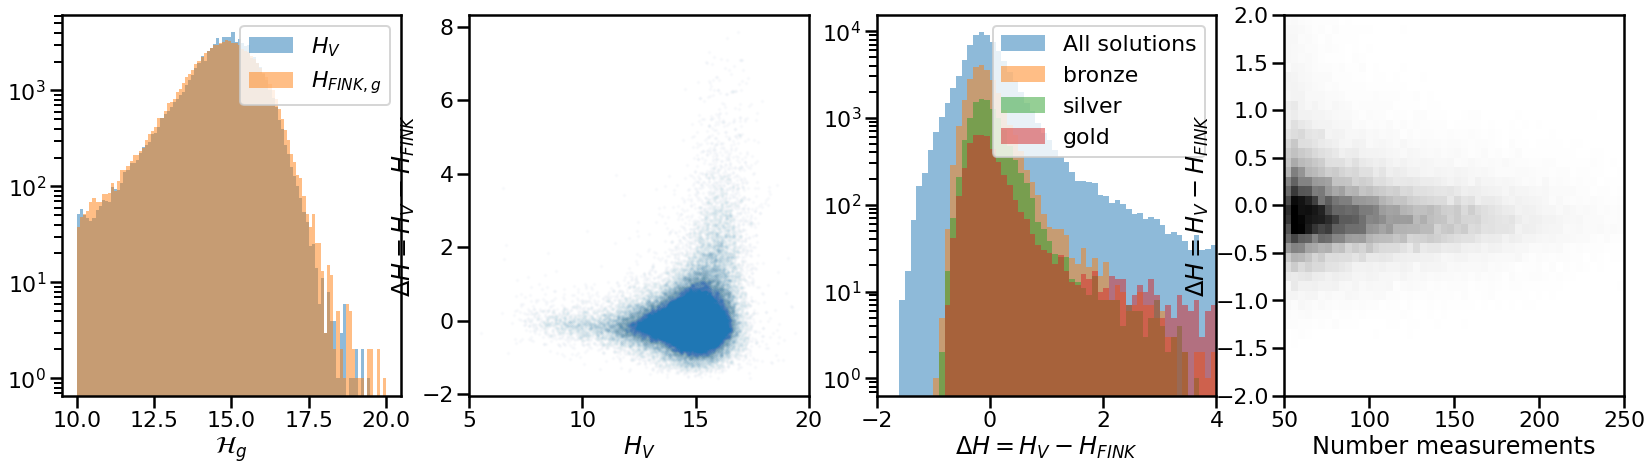

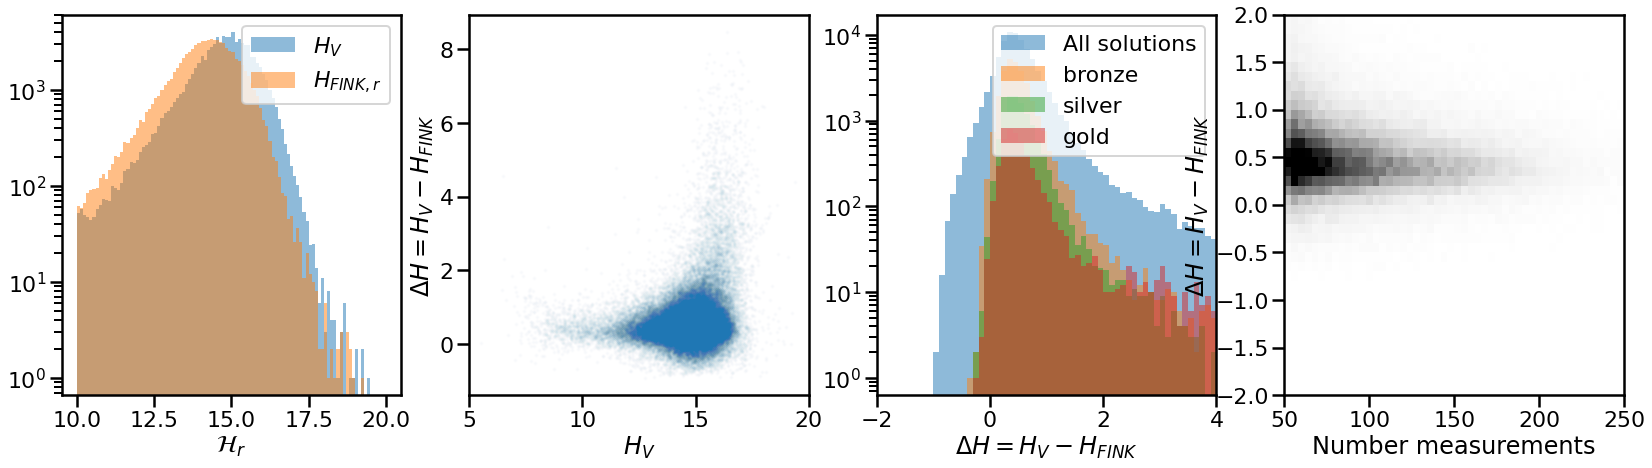

In [25]:
for filt in filters.values():
    fig, ax = plt.subplots(1,4, figsize=(28,7))

    ax[0].hist( data['absolute_magnitude.value'], range=[10,20], bins=100, alpha=0.5, label='$H_V$' )
    ax[0].hist( data['H_{}'.format(filt)], range=[10,20], bins=100, alpha=0.5, label='$H_{{FINK, {}}}$'.format(filt) )
    ax[0].set_xlabel('$\mathcal{{H}}_{}$'.format(filt))
    ax[0].set_yscale('log')
    ax[0].legend()


    ax[1].scatter( data['absolute_magnitude.value'], data['absolute_magnitude.value']-data['H_{}'.format(filt)], s=4, alpha=0.015 )
    ax[1].set_xlabel('$H_V$')
    ax[1].set_ylabel('$\\Delta H = H_V - H_{FINK}$')
    ax[1].set_xlim(5,20)


    ax[2].hist( data['absolute_magnitude.value']-data['H_{}'.format(filt)], range=[-5,5], bins=100, alpha=0.5, label='All solutions' )

    for f in ['bronze','silver','gold']:
        cond = (data['G1_{}'.format(filt)]>0.01) & (data['G2_{}'.format(filt)]>0.01) & (data.flavor==f)
        ax[2].hist( data.loc[cond,'absolute_magnitude.value']-data.loc[cond,'H_{}'.format(filt)], range=[-5,5], bins=100, alpha=0.5,
                   label=f'{f}' )

    # cond = (data['G1']>0.01) & (data['G2']>0.01)
    # ax[2].hist( data.loc[cond,'absolute_magnitude.value']-data.loc[cond,'H'], range=[-5,5], bins=100, alpha=0.5, label='Non-0 G1/G2' )
    # ax[2].hist( data['absolute_magnitude.value']-data['phase_functions.Generic/Johnson.V.H.value'], range=[-5,5], bins=100 )

    ax[2].set_xlabel('$\\Delta H = H_V - H_{FINK}$')
    ax[2].set_yscale('linear')
    ax[2].legend()
    ax[2].set_xlim(-2,4)
    ax[2].set_yscale('log')

    ax[3].hist2d( data['nmeasurements'], data['absolute_magnitude.value']-data['H_{}'.format(filt)],
                 range=[[50,250], [-2,2]], bins=[ 50, 40], 
                 cmap='Greys', 
                 vmax=500)
    ax[3].set_xlabel('Number measurements')
    ax[3].set_ylabel('$\\Delta H = H_V - H_{FINK}$')


    print('                 median   mean    std')
    deltaH = data['absolute_magnitude.value']-data['H_{}'.format(filt)]
    print( 'H_V   - H_FINK:  {:6.3f}  {:6.3f}  {:6.3f}'.format(np.nanmedian(deltaH), np.mean(deltaH), np.std(deltaH) ))

    for f in ['bronze','silver','gold']:
        # cond = (data['G1']>0.01) & (data['G2']>0.01) & (data.flavor==f)
        cond = (data.flavor==f)
        deltaH = data.loc[cond,'absolute_magnitude.value']-data.loc[cond,'H_{}'.format(filt)]
        print( 'H_V   - H_FINK:  {:6.3f}  {:6.3f}  {:6.3f}    {:}'.format(np.nanmedian(deltaH), np.mean(deltaH), np.std(deltaH), f ))

    deltaH_V = data['absolute_magnitude.value']-data['phase_functions.Generic/Johnson.V.H.value']
    print( 'H_MPC - H_V   :  {:6.3f}  {:6.3f}  {:6.3f}'.format(np.nanmedian(deltaH_V), np.mean(deltaH_V), np.std(deltaH_V) ))

    fig.savefig(f'{data_fink}plots/Hv_vs_HFINK_{filt}.png', facecolor='white', dpi=150)

### Goodness of fit

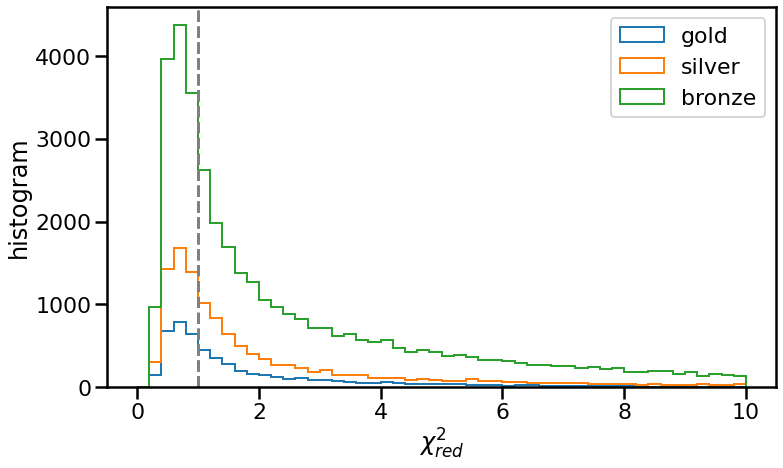

In [26]:
fig = plt.figure(figsize=(12, 7))

for flavor in ['gold', 'silver', 'bronze']:
    cond = data['flavor'] == flavor

    plt.hist(data.loc[cond,'chi2red'], bins=50, histtype='step', density=False, range=[0,10], label=flavor)
    plt.axvline(1, ls='--', color='grey', lw=3)
    plt.xlabel(r'$\chi^2_{red}$')
    plt.ylabel('histogram')
    plt.legend()
plt.show()
fig.savefig(f'{data_fink}plots/chi2.png', facecolor='white', dpi=150)

Hum the peak is slightly lower than 1.0: overfitting?

(0.0, 10.0)

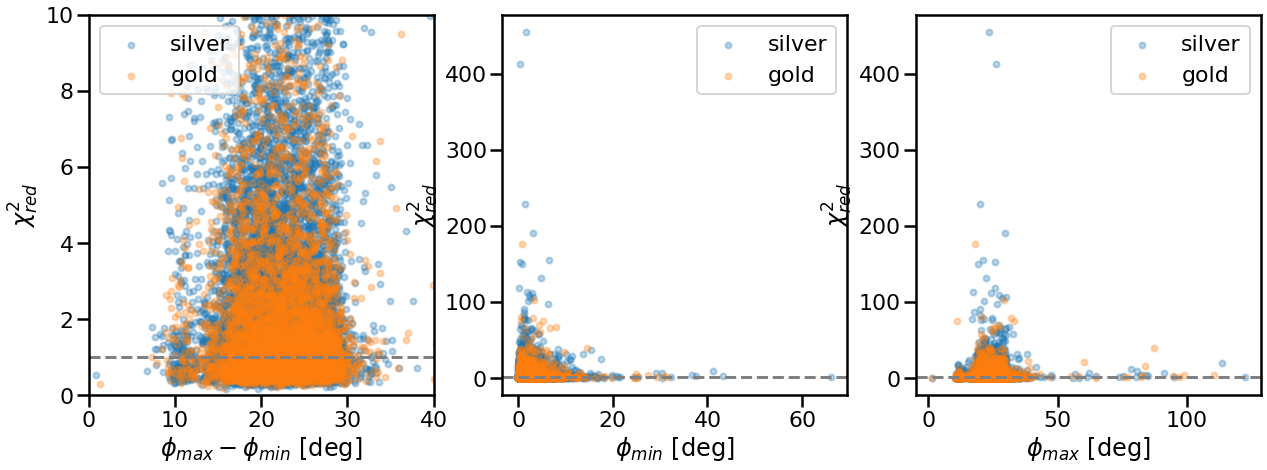

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(21, 7))

for flavor in ['silver', 'gold']:
    cond = data['flavor'] == flavor
    
    d_1 = data.loc[cond,'maxphase'] - data.loc[cond,'minphase']
    d_2 = data.loc[cond,'chi2red']
    ax[0].scatter(
        d_1,
        d_2,
        marker='.',
        alpha=0.3,
        label=flavor,
    )
    ax[0].set_xlabel(r'$\phi_{max} - \phi_{min}$ [deg]')

    d_1 = data.loc[cond,'minphase']
    d_2 = data.loc[cond,'chi2red']
    ax[1].scatter(
        d_1,
        d_2,
        marker='.',
        alpha=0.3,
        label=flavor,
    )
    ax[1].set_xlabel(r'$\phi_{min}$ [deg]')

    d_1 = data.loc[cond,'maxphase']
    d_2 = data.loc[cond,'chi2red']
    ax[2].scatter(
        d_1,
        d_2,
        marker='.',
        alpha=0.3,
        label=flavor,
    )
    ax[2].set_xlabel(r'$\phi_{max}$ [deg]')

    
for a in ax:
    a.axhline(1, ls='--', color='grey', lw=3)
    a.set_ylabel(r'$\chi^2_{red}$')
    a.legend()

    
    
    
ax[0].set_xlim([0, 40])
ax[0].set_ylim([0, 10])
# plt.show()

Interesting -- the chi2 value does not depend much on the phase range.

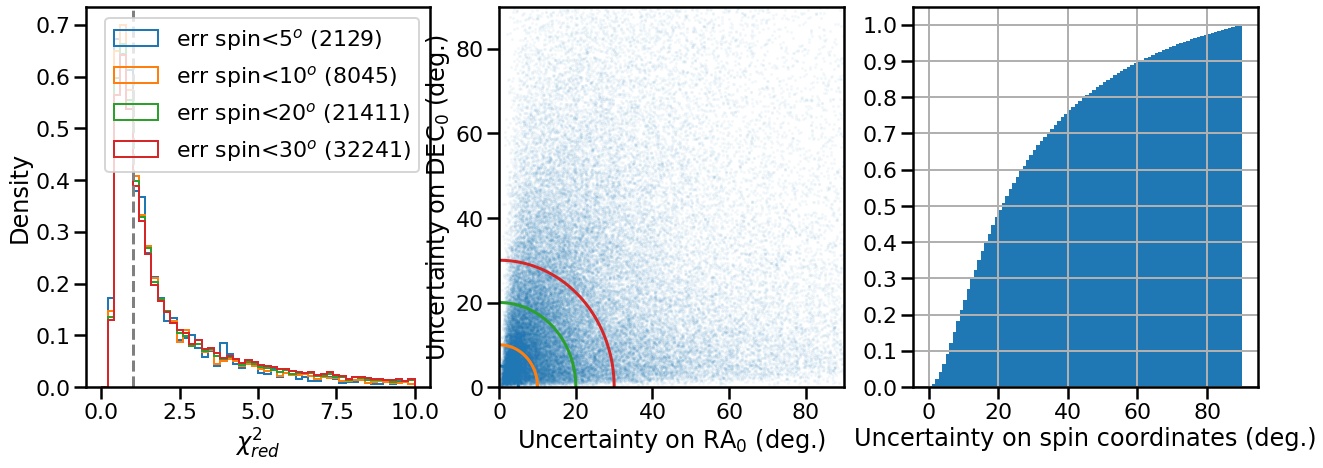

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(21,7))


for err in [5,10,20,30]:
    cond = data.dSpin<=err
    ax[0].hist(data.loc[cond,'chi2red'], bins=50, histtype='step', density=True, range=[0,10], label=f'err spin<{err:d}$^o$ ({len(data[cond])})')

    theta = np.linspace(0, np.pi/2, num=90 )
    ax[1].plot( err*np.cos(theta), err*np.sin(theta) )
    
ax[0].axvline(1, ls='--', color='grey')
ax[0].set_xlabel(r'$\chi^2_{red}$')
ax[0].set_ylabel('Density')
ax[0].legend()



ax[1].scatter( data.dRA0, data.dDEC0, s=1, alpha=0.05 )
ax[1].set_xlim(0,90)
ax[1].set_ylim(0,90)

ax[1].set_xlabel('Uncertainty on RA$_0$ (deg.)')
ax[1].set_ylabel('Uncertainty on DEC$_0$ (deg.)')

circ_err = np.sqrt( (data.dRA0*np.cos(np.radians(data.DEC0)) )**2 + data.dDEC0**2 )
ax[2].hist( circ_err, cumulative=True, density=True, range=[0,90], bins=90 )
# ax[2].axhline(0.5, linestyle='--', color='gray' )
ax[2].grid()
ax[2].set_yticks(np.linspace(0,1,num=11))
ax[2].set_xlabel('Uncertainty on spin coordinates (deg.)')

fig.savefig(f'{data_fink}plots/uncertainties_spin.png', facecolor='white', dpi=150)
plt.show()

## Spin distance

In [29]:
# Compute angular distances
spin_version = np.array(['A','B'])

for ks in ['1','2','3','4']:
    data[f'spins.{ks}.distance'] = np.nan
    cond = (~data[f'spins.{ks}.RA0.value'].isna())
    
    #------------------------------------------------------------------------------------------
    # A: Original spins
    data.loc[cond,f'spins.{ks}.distance.A'] = data.loc[cond,[f'spins.{ks}.RA0.value',f'spins.{ks}.DEC0.value', 'RA0','DEC0']].apply(
        lambda x: np.degrees(angular_separation( np.radians(x[0]), np.radians(x[1]), np.radians(x[2]), np.radians(x[3]) )) , axis=1
    )
    data.loc[cond,f'spins.{ks}.delta_RA.A'] = (data.loc[cond,f'spins.{ks}.RA0.value']-data.loc[cond,'RA0'] ) * np.cos(np.radians(data.loc[cond,f'spins.{ks}.DEC0.value']))
    data.loc[cond,f'spins.{ks}.delta_DEC.A'] = (data.loc[cond,f'spins.{ks}.DEC0.value']-data.loc[cond,'DEC0'] )

    #------------------------------------------------------------------------------------------
    # B: RA-180 & Flip DEC
    data.loc[cond,f'spins.{ks}.distance.B'] = data.loc[cond,[f'spins.{ks}.RA0.value',f'spins.{ks}.DEC0.value', 'RA0','DEC0']].apply(
        lambda x: np.degrees(angular_separation( np.radians(x[0]-180), np.radians(-x[1]), np.radians(x[2]), np.radians(x[3]) )) , axis=1
    )
    data.loc[cond,f'spins.{ks}.delta_RA.B'] = (data.loc[cond,f'spins.{ks}.RA0.value']-180.0-data.loc[cond,'RA0'] ) * np.cos(np.radians(-data.loc[cond,f'spins.{ks}.DEC0.value']))
    data.loc[cond,f'spins.{ks}.delta_DEC.B'] = (-data.loc[cond,f'spins.{ks}.DEC0.value']-data.loc[cond,'DEC0'] )

    #------------------------------------------------------------------------------------------
    # Find minimum distance and keep track of which spin version it is
    data.loc[cond,f'spins.{ks}.closest'] = data.loc[cond, [f'spins.{ks}.distance.A', 
                                                           f'spins.{ks}.distance.B']].apply( lambda x: int(np.argmin(x)), axis=1 )
    data = data.astype({f'spins.{ks}.closest':'Int64'})

    data.loc[cond,f'spins.{ks}.distance'] = data.loc[cond, [f'spins.{ks}.distance.A', 
                                                            f'spins.{ks}.distance.B']].apply( lambda x: np.min(x), axis=1 )
    data.loc[cond,f'spins.{ks}.version'] = data.loc[cond, [f'spins.{ks}.distance.A', 
                                                           f'spins.{ks}.distance.B']].apply( lambda x: spin_version[np.argmin(x)], axis=1 )

    #------------------------------------------------------------------------------------------
    # Find minimum distance and keep track of which spin version it is
    data.loc[cond,f'spins.{ks}.delta_RA'] = data.loc[cond, [f'spins.{ks}.delta_RA.A',
                                                            f'spins.{ks}.delta_RA.B', 
                                                            f'spins.{ks}.closest']].apply( lambda x: x[int(x[2])], axis=1 )
    data.loc[cond,f'spins.{ks}.delta_DEC'] = data.loc[cond, [f'spins.{ks}.delta_DEC.A',
                                                             f'spins.{ks}.delta_DEC.B', 
                                                             f'spins.{ks}.closest']].apply( lambda x: x[int(x[2])], axis=1 )

    
# Select the closest angularly
cond = ~data[f'spins.1.distance'].isna()
data.loc[cond,'spins.closest'] = data.loc[cond,['spins.1.distance','spins.2.distance','spins.3.distance','spins.4.distance']].apply( lambda x: int(np.argmin(x)), axis=1 )
data = data.astype({'spins.closest':'Int64'})

data.loc[cond,'spins.distance'] = data.loc[cond,['spins.1.distance','spins.2.distance','spins.3.distance','spins.4.distance']].apply( lambda x: np.min(x), axis=1 )
data.loc[cond,'spins.delta_RA'] = data.loc[cond, [f'spins.1.delta_RA',
                                                  f'spins.2.delta_RA',
                                                  f'spins.3.delta_RA',
                                                  f'spins.4.delta_RA', 
                                                  f'spins.closest']].apply( lambda x: x[int(x[4])], axis=1 )
data.loc[cond,'spins.delta_DEC'] = data.loc[cond, [f'spins.1.delta_DEC',
                                                   f'spins.2.delta_DEC',
                                                   f'spins.3.delta_DEC',
                                                   f'spins.4.delta_DEC', 
                                                   f'spins.closest']].apply( lambda x: x[int(x[4])], axis=1 )



In [30]:
# cond = ~data[f'spins.1.distance'].isna()
# cols = data.columns[data.columns.str.contains('distance')].to_list()+['spins.closest']+data.columns[data.columns.str.contains('delta')].to_list()
# cols = [',', 'spins.1.delta_RA.A','spins.1.delta_RA.B','spins.1.delta_RA.C','spins.1.delta_RA.D', 'spins.delta_RA']
# cols = cols[1:]

# data.loc[cond, cols]

Available spins: 2,290


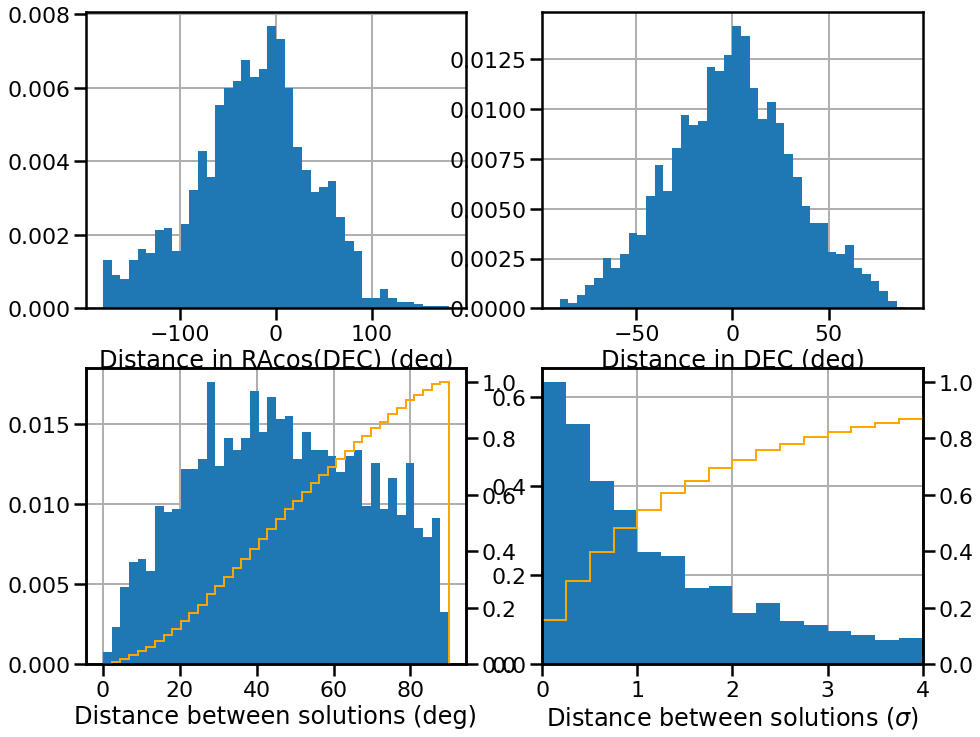

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))


cond = data['spins.closest']>=0
# cond *= data['flavor'] == 'bronze'
# cond *= data['flavor'] != 'toto'

print('Available spins: {:,}'.format(np.sum(cond)))

id_closest = data.loc[cond,'spins.closest'].astype('str')


nbins = 40
ax[0, 0].hist( data.loc[cond, 'spins.delta_RA'], range=[-180,180], bins=nbins, density=True )
ax[0, 1].hist( data.loc[cond, 'spins.delta_DEC'], range=[-90,90], bins=nbins, density=True )

ax[1, 0].hist( data.loc[cond, 'spins.distance'], range=[0,90], bins=nbins, density=True )
ax2 = ax[1, 0].twinx()
ax2.hist( data.loc[cond, 'spins.distance'], range=[0,90], bins=nbins, density=True , cumulative=True, histtype='step', color='orange')

ax[1, 1].hist( data.loc[cond, 'spins.distance']/data.dSpin, range=[0,10], bins=nbins, density=True )
ax3 = ax[1, 1].twinx()
ax3.hist( data.loc[cond, 'spins.distance']/data.dSpin, range=[0,10], bins=nbins, density=True, cumulative=True, histtype='step', color='orange' )
ax[1, 1].set_xlim(0,4)


ax[0, 0].set_xlabel('Distance in RAcos(DEC) (deg)')
ax[0, 1].set_xlabel('Distance in DEC (deg)')
ax[1, 0].set_xlabel('Distance between solutions (deg)')
ax[1, 1].set_xlabel('Distance between solutions ($\\sigma$)')



for a in ax:
    for a_ in a:
        a_.grid()
        a_.set_axisbelow(True)

fig.savefig(f'{data_fink}plots/fig_spins_validation.png', facecolor='white')
plt.show()

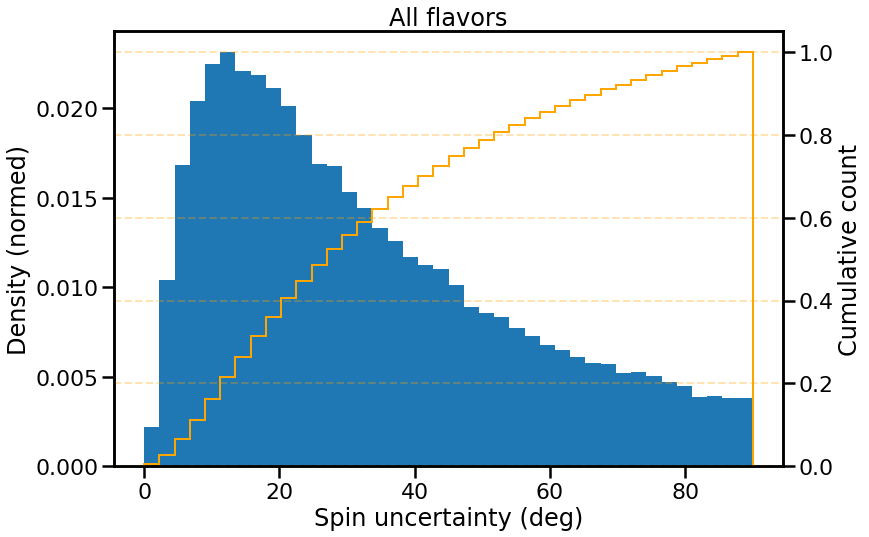

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.hist( data.dSpin, range=[0,90], bins=nbins, density=True,  )
ax0 = ax.twinx()

ax0.hist( data.dSpin, range=[0,90], bins=nbins, density=True, cumulative=True, histtype='step', color='orange' )

ax.set_xlabel('Spin uncertainty (deg)')
ax.set_ylabel('Density (normed)')
ax0.set_ylabel('Cumulative count')

ax0.grid(color='orange', alpha=0.3, ls='--')
ax.set_title('All flavors')
ax.set_axisbelow(True)
fig.savefig(f'{data_fink}plots/spin_uncertainty.png', facecolor='white', dpi=150)
plt.show()

### RA0

Number of observations for gold   :  5435/83094
Number of observations for silver : 12755/83094
Number of observations for bronze : 43158/83094


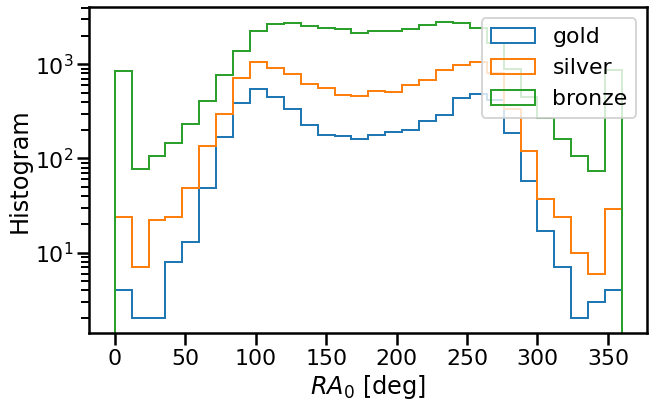

In [33]:
fig = plt.figure(figsize=(10, 6))
for flavor in ['gold', 'silver', 'bronze']:

    cond = data['flavor'] == flavor
    print('Number of observations for {:7s}: {:5d}/{:5d}'.format(flavor, len(data[cond]), len(data)))
    plt.hist(
        data.loc[cond, 'RA0'], 
        bins=30,
        histtype='step', 
        label=flavor, 
        density=False
    )
    
plt.yscale('log')
plt.legend(loc='best')
plt.xlabel(r'$RA_0$ [deg]')
plt.ylabel('Histogram')
plt.savefig(f'{data_fink}plots/ra0.png', dpi=150)
plt.show()

### Distribution of Spin EC & EQ coordinates & obliquity 

Number of observations for gold   :  5435/83094
Number of observations for silver : 12755/83094


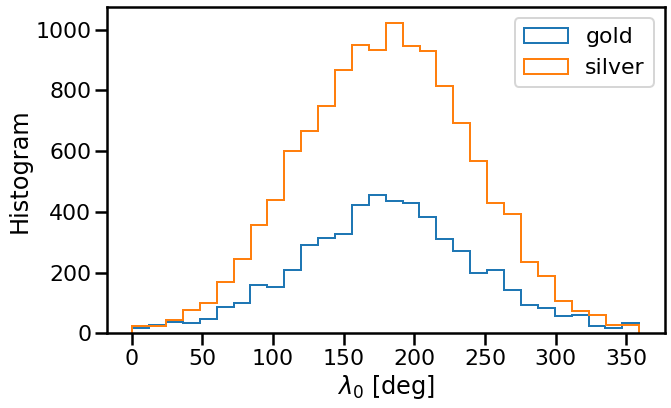

In [34]:
fig = plt.figure(figsize=(10, 6))
for flavor in ['gold', 'silver']:

    cond = data['flavor'] == flavor
    print('Number of observations for {:7s}: {:5d}/{:5d}'.format(flavor, len(data[cond]), len(data)))
    plt.hist(
        data.loc[cond, 'lon'], 
        bins=30,
        histtype='step', 
        label=flavor, 
        density=False
    )
    
# plt.yscale('log')
plt.legend(loc='best')
plt.xlabel(r'$\lambda_0$ [deg]')
plt.ylabel('Histogram')
plt.savefig(f'{data_fink}plots/lon.png', dpi=150)
plt.show()

The figure here above is **super** suspicious. The reason is the following: we have a 180deg. degeneracy in spin. So we should always randomize 50% of the sample and flip their spin coordinate by 180 deg on the sphere

Number of observations for gold   :  5435/83094
Number of observations for silver : 12755/83094


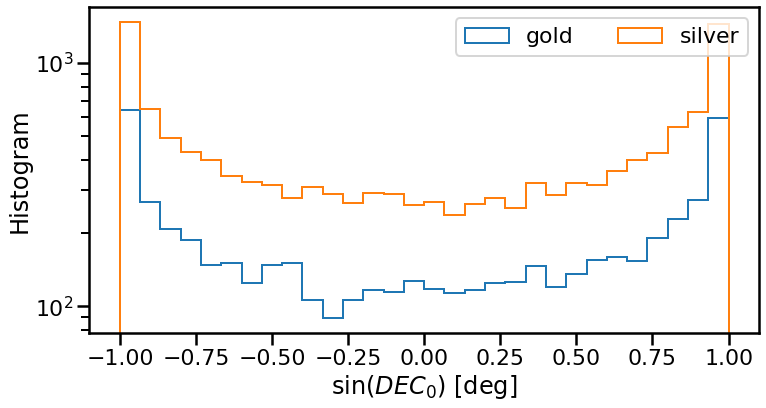

In [35]:
fig = plt.figure(figsize=(12, 6))
for flavor in ['gold', 'silver']:

    cond = data['flavor'] == flavor
    print('Number of observations for {:7s}: {:5d}/{:5d}'.format(flavor, len(data[cond]), len(data)))
    plt.hist(
        np.sin(data.loc[cond, 'DEC0']), 
        bins=30,
        histtype='step', 
        label=flavor, 
        density=False
    )
    
plt.yscale('log')
plt.legend(loc='best', ncol=3)
plt.xlabel(r'$\sin(DEC_0)$ [deg]')
plt.ylabel('Histogram')
plt.savefig(f'{data_fink}plots/sindec0.png', dpi=150)
plt.show()

Number of observations for gold   :  5435/83094
Number of observations for silver : 12755/83094
Number of observations for bronze : 43158/83094


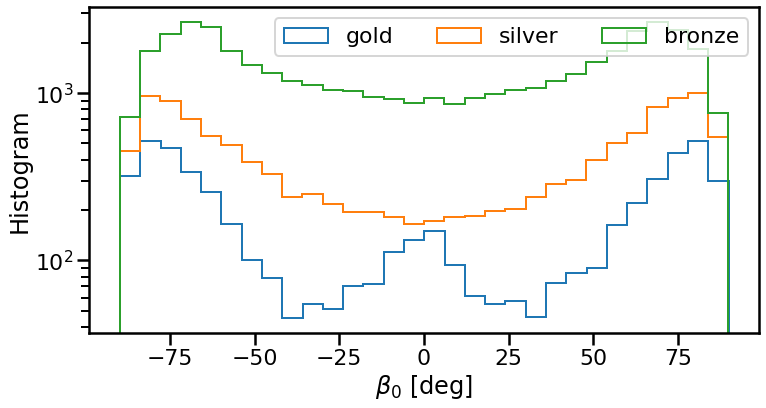

In [36]:
fig = plt.figure(figsize=(12, 6))
for flavor in ['gold', 'silver', 'bronze']:

    cond = data['flavor'] == flavor
    print('Number of observations for {:7s}: {:5d}/{:5d}'.format(flavor, len(data[cond]), len(data)))
    plt.hist(
        # np.sin(data.loc[cond, 'lat']), 
        data.loc[cond, 'lat'], 
        bins=30,
        histtype='step', 
        label=flavor, 
        density=False
    )
    
plt.yscale('log')
plt.legend(loc='best', ncol=3)
plt.xlabel(r'$\beta_0$ [deg]')
plt.ylabel('Histogram')
plt.savefig(f'{data_fink}plots/lat0.png', dpi=150)
plt.show()

Number of observations for gold   :  5435/83094
Number of observations for silver : 12755/83094
Number of observations for bronze : 43158/83094


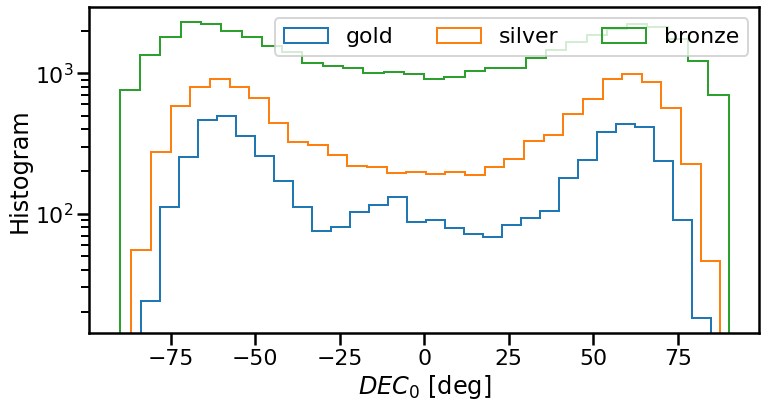

In [37]:
fig = plt.figure(figsize=(12, 6))
for flavor in ['gold', 'silver', 'bronze']:

    cond = data['flavor'] == flavor
    print('Number of observations for {:7s}: {:5d}/{:5d}'.format(flavor, len(data[cond]), len(data)))
    plt.hist(
        data.loc[cond, 'DEC0'], 
        bins=30,
        histtype='step', 
        label=flavor, 
        density=False
    )
    
plt.yscale('log')
plt.legend(loc='best', ncol=3)
plt.xlabel(r'$DEC_0$ [deg]')
plt.ylabel('Histogram')
plt.savefig(f'{data_fink}plots/dec0.png', dpi=150)
plt.show()

Number of observations for gold   :  5435/83094
Number of observations for silver : 12755/83094
Number of observations for bronze : 43158/83094


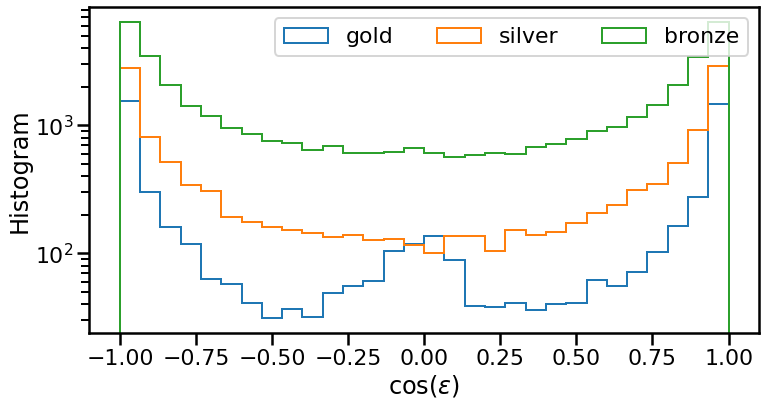

In [38]:
fig = plt.figure(figsize=(12, 6))
for flavor in ['gold', 'silver', 'bronze']:

    cond = data['flavor'] == flavor
    print('Number of observations for {:7s}: {:5d}/{:5d}'.format(flavor, len(data[cond]), len(data)))
    plt.hist(
        np.cos(np.radians(data.loc[cond, 'obliquity'])), 
        bins=30,
        histtype='step', 
        label=flavor, 
        density=False
    )
    
plt.yscale('log')
plt.legend(loc='best', ncol=3)
plt.xlabel(r'$\cos(\epsilon)$')
plt.ylabel('Histogram')
plt.savefig(f'{data_fink}plots/hist_obliquity.png', dpi=150)
plt.show()

### Oblateness

Number of observations for gold   :  2892/83094
Number of observations for silver :  7634/83094
Number of observations for bronze : 24003/83094


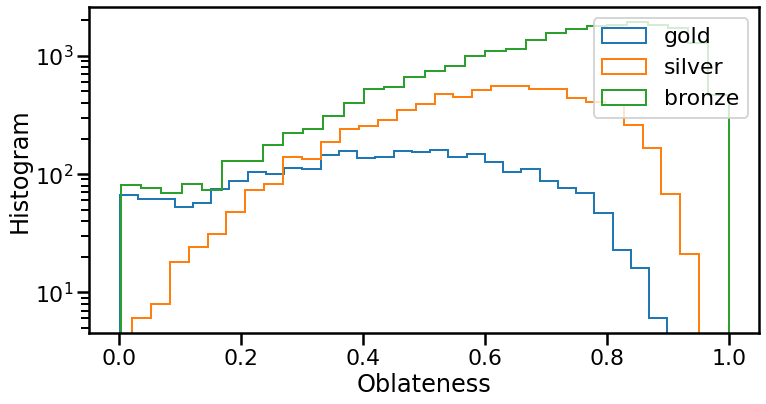

In [39]:
fig = plt.figure(figsize=(12, 6))
for flavor in ['gold', 'silver', 'bronze']:

    cond = data['flavor'] == flavor
    cond *= data['R']/data['dR'] > 1
    print('Number of observations for {:7s}: {:5d}/{:5d}'.format(flavor, len(data[cond]), len(data)))
    plt.hist(
        data.loc[cond, 'R'], 
        bins=30,
        histtype='step', 
        label=flavor, 
        density=False
    )
    
plt.yscale('log')
plt.legend(loc='best')
plt.xlabel(r'Oblateness')
plt.ylabel('Histogram')
plt.savefig(f'{data_fink}plots/R.png', dpi=150)
plt.show()

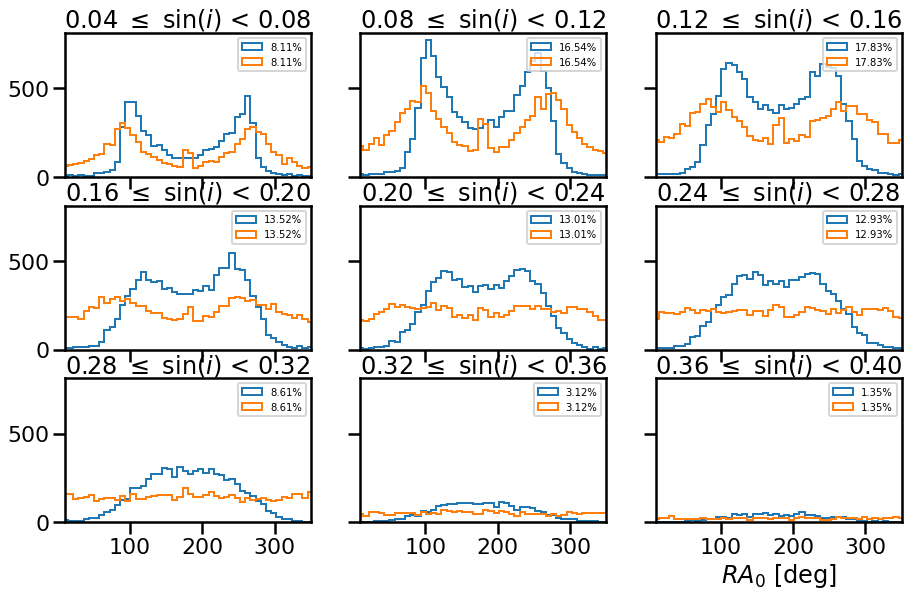

In [40]:
Is = np.sin(np.deg2rad(data['orbital_elements.inclination.value']))

fig, ax = plt.subplots(3, 3, figsize=(15, 9), sharex=True, sharey=True)
m = data['flavor'] != 'toto'


# Flip every second spin
cond = (data.index %2 ==0 )
data['RA0_flip'] = data['RA0']
data.loc[cond,'RA0_flip'] = (data.loc[cond,'RA0']-180) % 360


step = 0.04
count = 0
for i in range(0, 3):
    for j in range(0, 3):

        mi = (Is[m] >= count*step) * (Is[m] < (count+1)*step)
        ax[i, j].hist(
            data['RA0'][m][mi], 
            bins=50, 
            density=False,
            histtype='step', 
            label='{:.2f}%'.format(len(data['RA0'][m][mi])/len(data['RA0'][m]) * 100)
        )
        ax[i, j].hist(
            data['RA0_flip'][m][mi], 
            bins=50, 
            density=False,
            histtype='step', 
            label='{:.2f}%'.format(len(data['RA0'][m][mi])/len(data['RA0'][m]) * 100)
        )

        count += 1
        ax[i, j].set_title(r'{:.2f} $\leq$ $\sin(i)$ < {:.2f}'.format(count*step, (count+1)*step))
        ax[i, j].set_xlim(10, 350)

        # only on the last one
        ax[i, j].legend(fontsize=10)
plt.xlabel(r'$RA_0$ [deg]')
# plt.yscale('log')
fig.savefig(f'{data_fink}plots/ra0_vs_incl_distrib.png', facecolor='white', dpi=150)
plt.show()

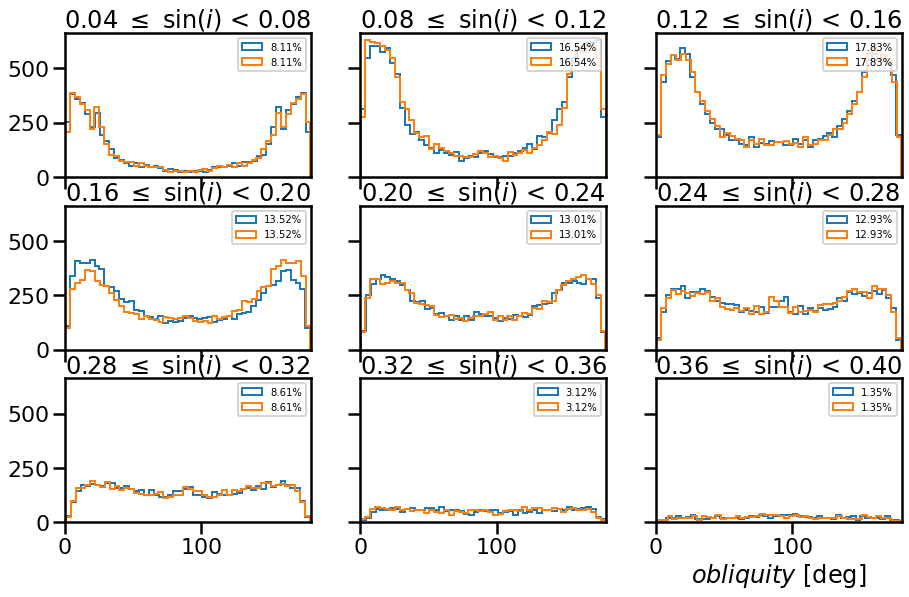

In [41]:
Is = np.sin(np.deg2rad(data['orbital_elements.inclination.value']))

fig, ax = plt.subplots(3, 3, figsize=(15, 9), sharex=True, sharey=True)
m1 = data['flavor'] == 'gold'
m = data['flavor'] != 'toto'



step = 0.04
count = 0
for i in range(0, 3):
    for j in range(0, 3):

        mi = (Is[m] >= count*step) * (Is[m] < (count+1)*step)
        ax[i, j].hist(
            data['obliquity'][m][mi], 
            bins=50, 
            density=False,
            histtype='step', 
            label='{:.2f}%'.format(len(data['RA0'][m][mi])/len(data['RA0'][m]) * 100)
        )
        ax[i, j].hist(
            data['obliquity_alt'][m][mi], 
            bins=50, 
            density=False,
            histtype='step', 
            label='{:.2f}%'.format(len(data['RA0'][m][mi])/len(data['RA0'][m]) * 100)
        )

        count += 1
        ax[i, j].set_title(r'{:.2f} $\leq$ $\sin(i)$ < {:.2f}'.format(count*step, (count+1)*step))
        ax[i, j].set_xlim(0,180)

        # only on the last one
        ax[i, j].legend(fontsize=10)
        
plt.xlabel(r'$obliquity$ [deg]')
# plt.yscale('log')
fig.savefig(f'{data_fink}plots/obliquity_vs_incl_distrib_with_flip.png', facecolor='white', dpi=150)
plt.show()

Not sure to understand why the obliquity anisotropy is more marked for objects with low inclinaison. There are some article on that with D. Vokrouhlicky. Let's double check. 

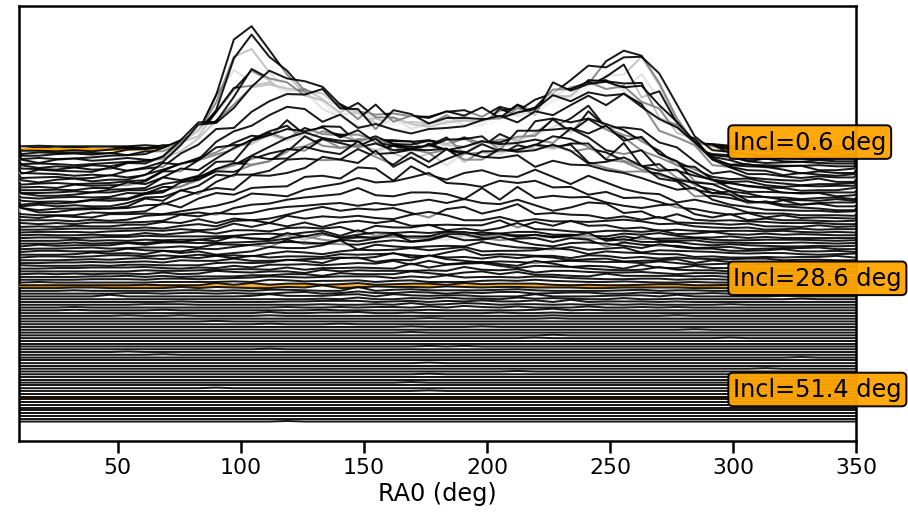

In [42]:
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

# cond = data['flavor'] == 'silver'
cond = data['flavor'] != 'toto'

d_1 = data.loc[cond,'RA0']
Is = np.sin(np.deg2rad(data['orbital_elements.inclination.value']))
d_2 = Is[cond]

H, x, y = np.histogram2d(d_1, d_2, bins=(50, 100))

nx = len(H)
ny = len(H[0])
fig = plt.figure(figsize=(15, 8), facecolor='w')
ax = fig.add_subplot(111)
maxs = []
for iy in range(ny):
    # Offset each line by this amount: we want the first lines plotted
    # at the top of the chart and to work our way down
    offset = (ny-iy)*5
    # Plot the line and fill under it: increase the z-order each time
    # so that lower lines and their fills are plotted over higher ones
#     yhat = savgol_filter(H.T[iy], 7, 3)
    yhat = H.T[iy]
    xcenters = (x[:-1] + x[1:]) / 2
    ax.plot(xcenters, yhat+offset, 'k', lw=2, zorder=(iy+1)*2, alpha=0.9)
    ax.fill_between(xcenters, yhat+offset, offset, facecolor='w', lw=0, zorder=(iy+1)*2-1, alpha=0.5)
    if np.max(yhat) > 1.1 * np.mean(yhat):
        max_ = np.argmax(yhat)
        maxs.append([xcenters[max_], yhat[max_]])
ax.get_yaxis().set_visible(False)

for incl in [10, int(ny/2), ny-1]:
    ax.text(300, offset*incl, 'Incl={:.1f} deg'.format(np.rad2deg(y[::-1][:-1][incl])), color='black', 
        bbox=dict(facecolor='orange', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.95), zorder=1e6)
    plt.axhline(offset*incl, color='orange', zorder=5)
plt.xlim(10, 350)
plt.xlabel('RA0 (deg)')
fig.savefig(f'{data_fink}plots/ra0_vs_incl_waterfall.png', facecolor='white', dpi=150)
plt.show()

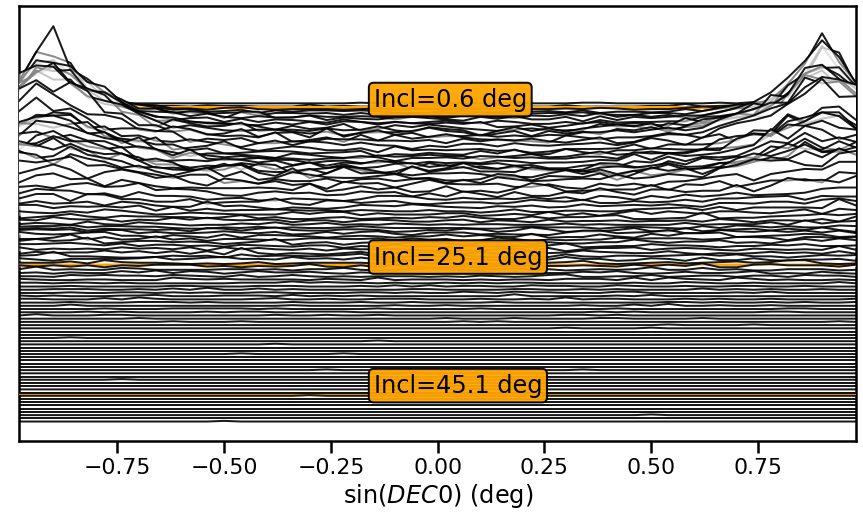

In [43]:
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

# cond = data['flavor'] == 'silver'
cond = data['flavor'] != 'bronze'

d_1 = np.sin(np.deg2rad(data.loc[cond,'DEC0']))
d_2 = Is[cond]

H, x, y = np.histogram2d(d_1, d_2, bins=(50, 100))

nx = len(H)
ny = len(H[0])
fig = plt.figure(figsize=(15, 8), facecolor='w')
ax = fig.add_subplot(111)
maxs = []
for iy in range(ny):
    # Offset each line by this amount: we want the first lines plotted
    # at the top of the chart and to work our way down
    offset = (ny-iy)*5
    # Plot the line and fill under it: increase the z-order each time
    # so that lower lines and their fills are plotted over higher ones
#     yhat = savgol_filter(H.T[iy], 7, 3)
    yhat = H.T[iy]
    xcenters = (x[:-1] + x[1:]) / 2
    ax.plot(xcenters, yhat+offset, 'k', lw=2, zorder=(iy+1)*2, alpha=0.9)
    ax.fill_between(xcenters, yhat+offset, offset, facecolor='w', lw=0, zorder=(iy+1)*2-1, alpha=0.5)
    if np.max(yhat) > 1.1 * np.mean(yhat):
        max_ = np.argmax(yhat)
        maxs.append([xcenters[max_], yhat[max_]])
ax.get_yaxis().set_visible(False)

for incl in [10, int(ny/2), ny-1]:
    ax.text(-0.15, offset*incl, 'Incl={:.1f} deg'.format(np.rad2deg(y[::-1][:-1][incl])), color='black', 
        bbox=dict(facecolor='orange', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.95), zorder=1e6)
    plt.axhline(offset*incl, color='orange', zorder=5)
plt.xlim(xcenters[0], xcenters[-1])
plt.xlabel('$\sin(DEC0)$ (deg)')
fig.savefig(f'{data_fink}plots/dec0_vs_incl_waterfall.png', facecolor='white', dpi=150)
plt.show()

In [44]:
m = data['flavor'] == 'gold'
cols = ['ssnamenr', 'nmeasurements', 'ndays', 'spins.distance', 'R', 'minphase', 'maxphase']
data[m][cols]

ssnamenr  nmeasurements        ndays  spins.distance             R  \
15         1354            296  1178.319641             NaN  5.552731e-01   
20       118703             74   570.974028             NaN  4.788015e-01   
25         2711            206  1179.288461             NaN  1.275852e-01   
27       161235             70   199.695961             NaN  2.751516e-01   
48       238798             56   588.853299             NaN  2.062290e-01   
...         ...            ...          ...             ...           ...   
103909    30429            176  1147.614618             NaN  7.144603e-02   
103938    40804            162  1172.489120             NaN  5.611014e-01   
103949     1410            187   988.835463             NaN  6.800702e-01   
103979    59394            109  1023.983021             NaN  1.000000e-06   
103991   106171             69   949.667488             NaN  6.810169e-01   

        minphase   maxphase  
15      0.660366  21.879463  
20      2.157365  27.215970  
25      4.072446  21.902863  
27      1.553744  28.641188  
48      0.507623  28.630042  
...          ...        ...  
103909  0.199443  21.596628  
103938  6.777270  27.238607  
103949  2.469547  21.236047  
103979  1.956018  28.522793  
103991  1.964262  18.121013  

[5435 rows x 7 columns]

In [45]:
m = data['flavor'] == 'gold'
cols = ['ssnamenr', 'nmeasurements', 'ndays', 'spins.distance', 'R', 'minphase', 'maxphase', 'RA0', 'DEC0']
data[m][cols][data[m]['spins.distance'] > 0]

ssnamenr  nmeasurements        ndays  spins.distance             R  \
363         774            221  1146.435961       80.735912  1.000000e-06   
439        1958            312  1179.389051       54.801448  3.802921e-01   
750        2836            211   953.103009       16.347064  9.979215e-02   
821       15290            184   976.006308       41.242293  5.811390e-01   
2265        166            167  1141.671655       81.507839  3.445027e-01   
...         ...            ...          ...             ...           ...   
99021        24             82  1125.539445       12.181428  1.000028e-06   
99127      7694            212   968.931921        6.439781  1.000000e-06   
99149       289            184  1183.359907       14.618827  4.778538e-01   
100479      205            197  1135.652442       55.031902  1.388966e-01   
102621      299            147  1027.889907       10.511412  1.001019e-06   

        minphase   maxphase         RA0       DEC0  
363     1.082870  19.096251  121.431447 -59.931584  
439     4.279513  22.019896  260.761323  51.687248  
750     4.043660  19.203359  110.313374 -47.472526  
821     3.339648  21.379928  195.003800 -74.627767  
2265    2.500820  27.669590  267.340161  32.262651  
...          ...        ...         ...        ...  
99021   1.037637  19.738912   95.214852 -69.024321  
99127   3.820688  22.437680  232.270446  58.663887  
99149   3.523592  25.179516  244.445749  55.315960  
100479  2.630254  21.723765   90.130500 -67.146736  
102621  1.142668  25.418645   89.246749 -72.756691  

[179 rows x 9 columns]

## Chi2

In [46]:
data_hg1g2sp = pd.read_parquet(f'{data_fink}data/sso_bft_50_inf_hg1g2spins.parquet')
data_hg1g2 = pd.read_parquet(f'{data_fink}data/sso_bft_50_inf_hg1g2.parquet')
data_hg12 = pd.read_parquet(f'{data_fink}data/sso_bft_50_inf_hg12.parquet')
data_hg = pd.read_parquet(f'{data_fink}data/sso_bft_50_inf_hg.parquet')

In [47]:
d1 = data[['ssnamenr', 'chi2red', 'noppositions', 'flavor']]
names = ['_hg1g2sp', '_hg1g2', '_hg12', '_hg']
for suffix, d_ in zip(names, [data_hg1g2sp, data_hg1g2, data_hg12, data_hg]):
    d_['chi2red' + suffix] = d_['params'].apply(lambda x: x['chi2red'])
    cols = ['ssnamenr', 'chi2red' + suffix]
    d2 = d_[cols]
    d1 = d1.merge(d2, on='ssnamenr', suffixes=('', suffix))

In [48]:
d1

ssnamenr    chi2red  noppositions  flavor  chi2red_hg1g2sp  \
0        14190   9.583546           3.0  bronze         6.400788   
1        47488   1.283283           2.0  bronze         0.643250   
2        66888   0.865944           2.0  silver         0.890840   
3        23543   8.294042           2.0  bronze         5.883724   
4        29348   1.052896           3.0  silver         0.763858   
...        ...        ...           ...     ...              ...   
83089    15984   3.418029           3.0  bronze         5.145728   
83090    66215  12.664742           2.0  bronze        20.979727   
83091   190755   1.201927           3.0  bronze         1.094912   
83092    28796   9.075871           3.0  bronze        46.905659   
83093    38459   1.251681           2.0  silver         2.545527   

       chi2red_hg1g2  chi2red_hg12  chi2red_hg  
0           6.959709      7.375853    7.484233  
1           1.562422      1.550541    1.551524  
2           1.542490      1.550130    1.545391  
3           5.941295      6.045251    5.957334  
4           0.792179      0.798894    0.798114  
...              ...           ...         ...  
83089       7.436670      7.502568    7.500905  
83090      23.513988     23.418571   23.707754  
83091       1.260838      1.305845    1.288842  
83092      47.458504     48.075619   48.021889  
83093       2.486452      2.757051    2.509453  

[83094 rows x 8 columns]

In [49]:
# fig = plt.figure(figsize=(10, 10))

# plt.scatter(d1['chi2red_spins'], d1['chi2red_y'], marker='.', alpha=0.5)
# plt.plot(range(0, 14000), color='C3')
# plt.xlim(0, 40)
# plt.ylim(0, 40)
# plt.show()

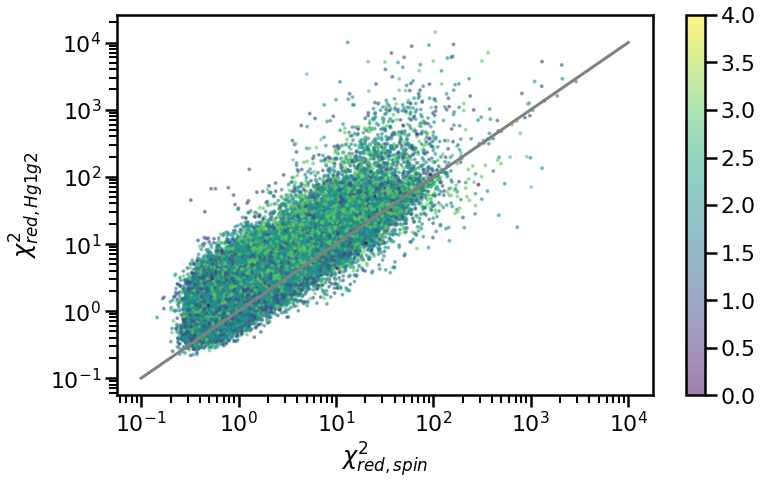

In [50]:
fig, ax = plt.subplots(figsize=(12, 7))

s = ax.scatter( d1['chi2red'] , d1['chi2red_hg1g2'], s=4, c=d1['noppositions'], alpha=0.5)
xx = np.logspace(-1,4)
ax.plot(xx,xx, color='grey')

fig.colorbar(s, ax=ax)

ax.set_xlabel('$\chi^2_{red, spin}$')
ax.set_ylabel('$\chi^2_{red, Hg1g2}$')
ax.set_xscale('log')
ax.set_yscale('log')

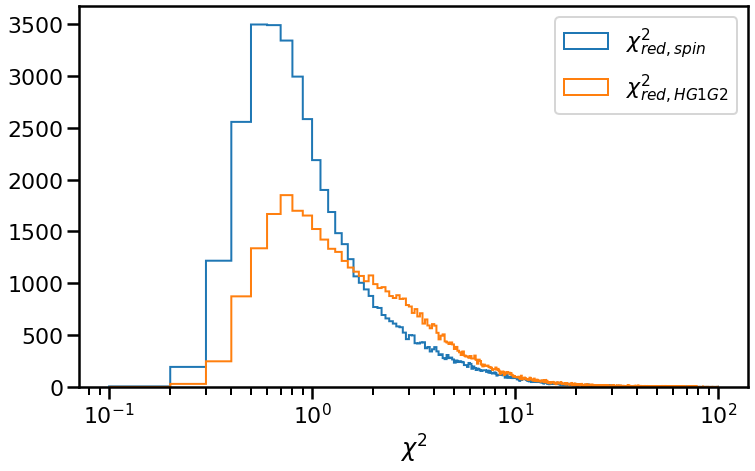

In [51]:
fig, ax = plt.subplots(figsize=(12, 7))

cond = d1['flavor'] == d1['flavor']

bins = np.arange(0.1, 100, 0.1)

plt.hist(d1.loc[cond, 'chi2red'], bins=bins, label='$\chi^2_{red, spin}$', histtype='step')
plt.hist(d1.loc[cond, 'chi2red_hg1g2'], bins=bins, label='$\chi^2_{red, HG1G2}$', histtype='step')

ax.set_xlabel('$\chi^2$')
plt.legend()
ax.set_xscale('log')

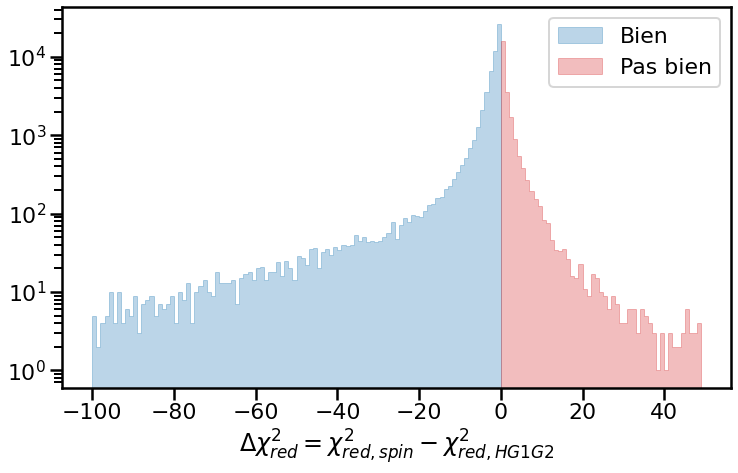

In [52]:
fig = plt.figure(figsize=(12, 7))

diff = d1['chi2red'] - d1['chi2red_hg1g2']
m = diff >= 0

bins = range(-100, 50, 1)
plt.hist((diff)[~m], bins=bins, range=[-100, 50], color='C0', alpha=0.3, lw=1, edgecolor='C0', histtype='stepfilled', label='Bien');
_, bins, _ = plt.hist((diff)[m], bins=bins, range=[-100, 50], color='C3', alpha=0.3, lw=1, edgecolor='C3', histtype='stepfilled', label='Pas bien');

plt.yscale('log')
plt.xlabel('$\Delta \chi^2_{red} = \chi^2_{red, spin} - \chi^2_{red, HG1G2}$')
plt.legend()
fig.savefig(f'{data_fink}plots/dchi2.png', facecolor='white', dpi=150)
plt.show()

In [53]:
drms = data[['ssnamenr', 'rms', 'noppositions', 'flavor']]
names = ['_hg1g2sp', '_hg1g2', '_hg12', '_hg']
for suffix, d_ in zip(names, [data_hg1g2sp, data_hg1g2, data_hg12, data_hg]):
    d_['rms' + suffix] = d_['params'].apply(lambda x: x['rms'])
    cols = ['ssnamenr', 'rms' + suffix]
    d2 = d_[cols]
    drms = drms.merge(d2, on='ssnamenr', suffixes=('', suffix))

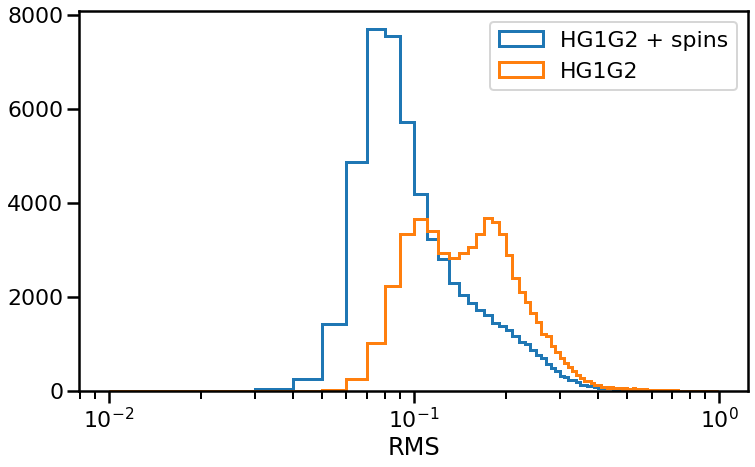

In [54]:
fig, ax = plt.subplots(figsize=(12, 7))

cond = drms['flavor'] == drms['flavor']

bins = np.arange(0.01, 1, 0.01)

ax.hist(drms.loc[cond, 'rms'], bins=bins, label='HG1G2 + spins', histtype='step', lw=3)
ax.hist(drms.loc[cond, 'rms_hg1g2'], bins=bins, label='HG1G2', histtype='step', lw=3)

ax.set_xlabel('RMS')
ax.set_xscale('log')
plt.legend();

Oh, ça c'est beau! Avec le spin, le residu sur la RMS n'est plus bi-modal :-)

## Families

Text(0, 0.5, 'Absolute magnitude H')

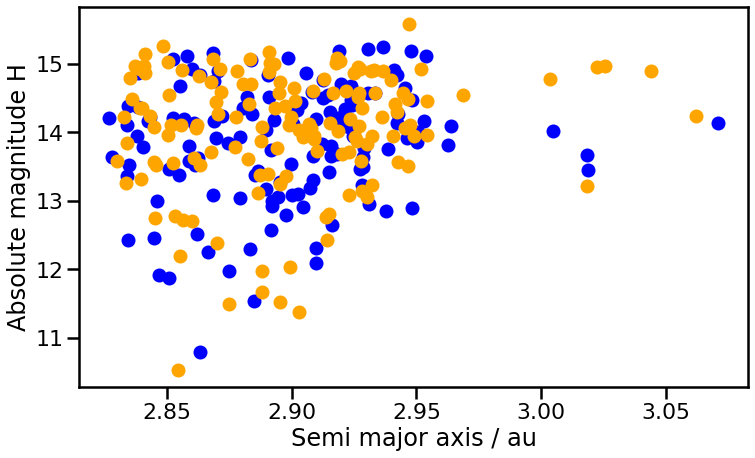

In [55]:
fig, ax = plt.subplots(figsize=(12, 7))


fam = 'Koronis'
flavor = 'silver'
prog = (data['family.family_name']==fam) & \
       (data['obliquity_alt']<90) & \
       (data['flavor']==flavor)
xax = 'proper_elements.proper_semi_major_axis.value'
yax = 'proper_elements.proper_inclination.value'
yax = 'absolute_magnitude.value'

ax.scatter( data.loc[prog,xax], 
            data.loc[prog,yax], 
            color='blue' )

retro = (data['family.family_name']==fam) & \
        (data['obliquity_alt']>=90) & \
       (data['flavor']==flavor)
ax.scatter( data.loc[retro,xax], 
            data.loc[retro,yax], 
            color='orange' )

ax.set_xlabel('Semi major axis / au')
ax.set_ylabel('Absolute magnitude H')


We have a complete **patchwork** of obliquity (prograde/retrograde-wise) in the family, while we expect a clear separation (at mid-semi major axis)

## Spin orientation on the celestial sphere

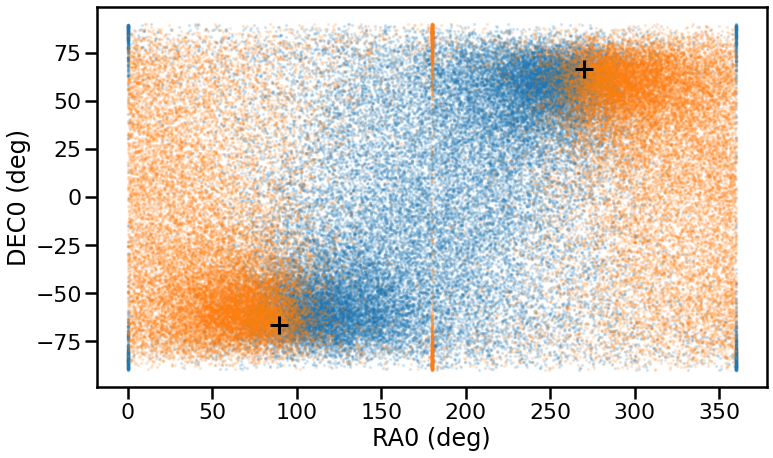

In [56]:
fig, ax = plt.subplots(figsize=(12, 7))

flavor = 'silver'
cond = (data['flavor']==flavor)
cond = (data.index %2 ==0 )
xax = 'RA0'
yax = 'DEC0'

ax.scatter( data.loc[cond,xax], 
            data.loc[cond,yax], 
          s=2, alpha=0.15)
ax.scatter( (data.loc[~cond,xax]-180) % 360, 
            -data.loc[~cond,yax], 
          s=2, alpha=0.15)

# coords = SkyCoord(ra=ra, dec=dec, distance=200*u.parsec, frame='hcrs')
# data['lon'] = coords.heliocentricmeanecliptic.lon.value
# data['lat'] = coords.heliocentricmeanecliptic.lat.value
coords = SkyCoord(lon=0.1*u.degree, lat=89.9*u.degree, distance=200*u.parsec, frame='heliocentricmeanecliptic')
ax.scatter( coords.hcrs.ra.value, coords.hcrs.dec.value, marker='+', s=300,color='black' )
coords = SkyCoord(lon=0.1*u.degree, lat=-89.9*u.degree, distance=200*u.parsec, frame='heliocentricmeanecliptic')
ax.scatter( coords.hcrs.ra.value, coords.hcrs.dec.value, marker='+', s=300,color='black' )


ax.set_xlabel('RA0 (deg)')
ax.set_ylabel('DEC0 (deg)')
fig.savefig(f'{data_fink}plots/ra0_vs_dec0_with_flip.png', facecolor='white', dpi=150)



If we remove the 1/2 randomized spin orientation, the figure is super scary. But otherwise, the distribution close to EC poles is VERY nice

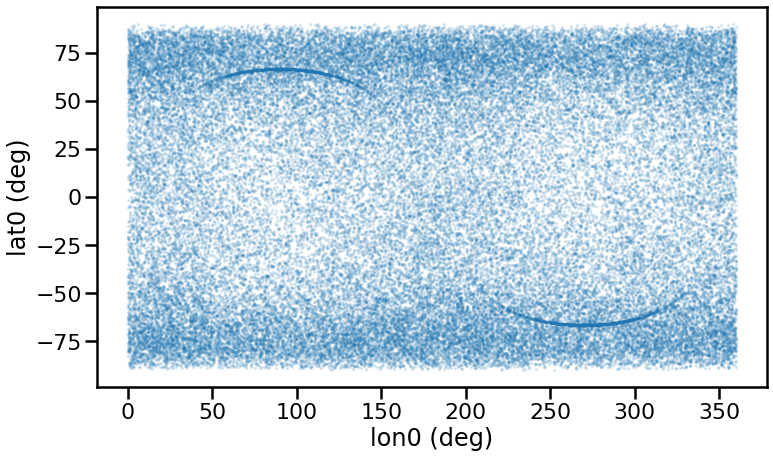

In [57]:
fig, ax = plt.subplots(figsize=(12, 7))


# Against simple/stupid randomization of orientation
cond = (data.index %2 == 0 )
data['lon_flip'] = data['lon']
data.loc[cond,'lon_flip'] = (data.loc[cond,'lon']-180) % 360
data['lat_flip'] = data['lat']
data.loc[cond,'lat_flip'] = -data.loc[cond,'lat']


flavor = 'silver'
cond = (data['flavor']==flavor)
cond = (data['flavor']==data['flavor'])
xax = 'lon_flip'
yax = 'lat_flip'



ax.scatter( data.loc[cond,xax], 
            data.loc[cond,yax], 
          s=2, alpha=0.15)
ax.set_xlabel('lon0 (deg)')
ax.set_ylabel('lat0 (deg)')
fig.savefig(f'{data_fink}plots/lon0_vs_lat0.png', facecolor='white', dpi=150)



VERY nice concentration at EC poles, homogeneous at low lat

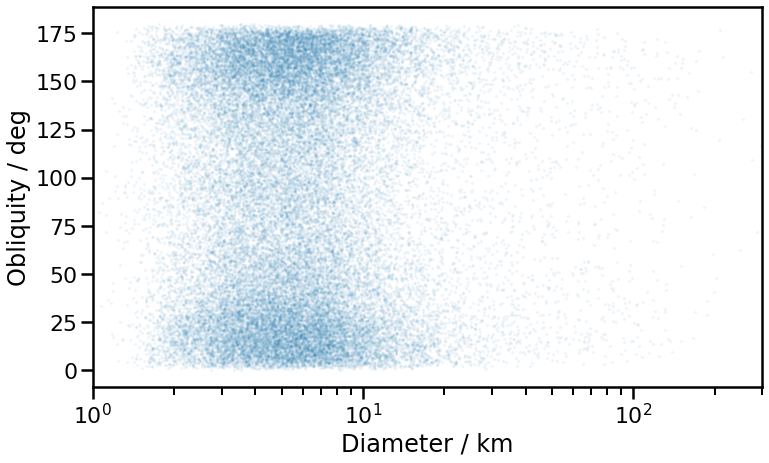

In [67]:
fig, ax = plt.subplots(figsize=(12, 7))


# flavor = 'silver'
# cond = (data['flavor']==flavor)
cond = (data['flavor']==data['flavor'])

ax.scatter( data.loc[cond,'diameter.value'],
            data.loc[cond,'obliquity'], 
            s=2, alpha=0.05 )

ax.set_xscale('log')
ax.set_xlim(1,300)
ax.set_xlabel('Diameter / km')
ax.set_ylabel('Obliquity / deg')

fig.savefig(f'{data_fink}plots/obliquity_vs_diameter.png', facecolor='white', dpi=150)


A very clear signal of YORP at small diameters!!

## Color

In [59]:
def gauss(x, m, mu, sigma):
    return m * np.exp(-(x - mu)**2 / (2 * sigma**2))

def double_gauss(x, m1, mu1, sigma1, m2, mu2, sigma2):
    g1 = gauss(x, m1, mu1, sigma1)
    g2 = gauss(x, m2, mu2, sigma2)
    return g1 + g2

7230


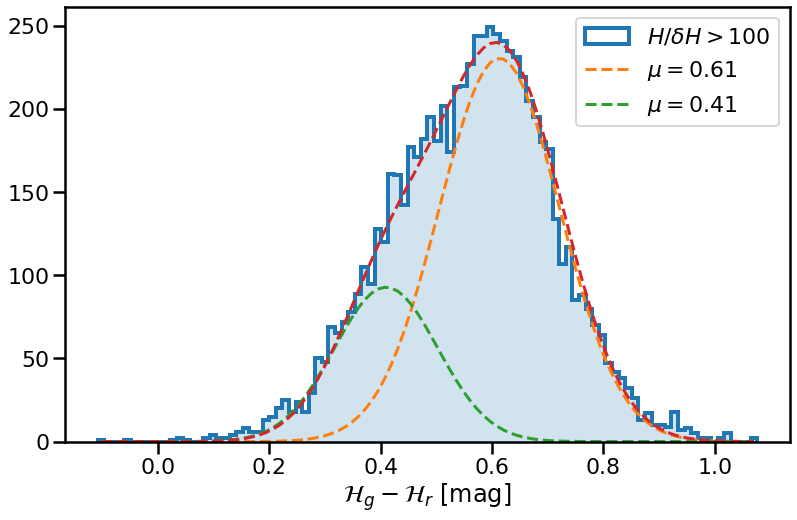

In [60]:
fig = plt.figure(figsize=(13, 8))

nsigma = 100
nbins = 100

cond = data['H_g']/data['dH_g'] > nsigma
cond *= data['H_r']/data['dH_r'] > nsigma

# bronze/silver/gold do not focus enough on the quality of H
# cond = data['flavor'] == 'gold'

dH = data.loc[cond,'H_g'] - data.loc[cond,'H_r']
plt.hist(dH, bins=nbins, histtype='step', lw=4, label='$H/\delta H > {}$'.format(nsigma))
plt.hist(dH, bins=nbins, color='C0', alpha=0.2)

# meandH = np.mean(dH)
# plt.axvline(meandH, color='C0', ls='--', label='mean = {:.2f} mag'.format(meandH), alpha=0.5)

bin_values, bin_boundaries = np.histogram(dH, bins=nbins)
x = bin_boundaries[:-1] + 0.5*(bin_boundaries[1] - bin_boundaries[0])
popt, pcov = curve_fit(
    double_gauss, 
    x, 
    bin_values, 
    p0=[100, 0.6, 0.1, 100, 0.1, 0.1], 
    bounds=([0, 0, 0, 0, 0, 0], [1e5, 1e1, 1e1, 1e5, 1e1, 1e1])
)
plt.plot(x, gauss(x, *popt[:3]), label='$\mu = {:.2f}$'.format(popt[1]), ls='--')
plt.plot(x, gauss(x, *popt[3:]), label='$\mu = {:.2f}$'.format(popt[4]), ls='--')
plt.plot(x, double_gauss(bin_boundaries[:-1], *popt), ls='--')

print(len(dH))
plt.xlabel(r'$\mathcal{H}_g - \mathcal{H}_r$ [mag]')
# plt.xlim(-1, 2)
# plt.yscale('log')
plt.legend();
fig.savefig('plots/color_at_1pc.png', facecolor='white', dpi=150)
plt.show()

## Fit failures

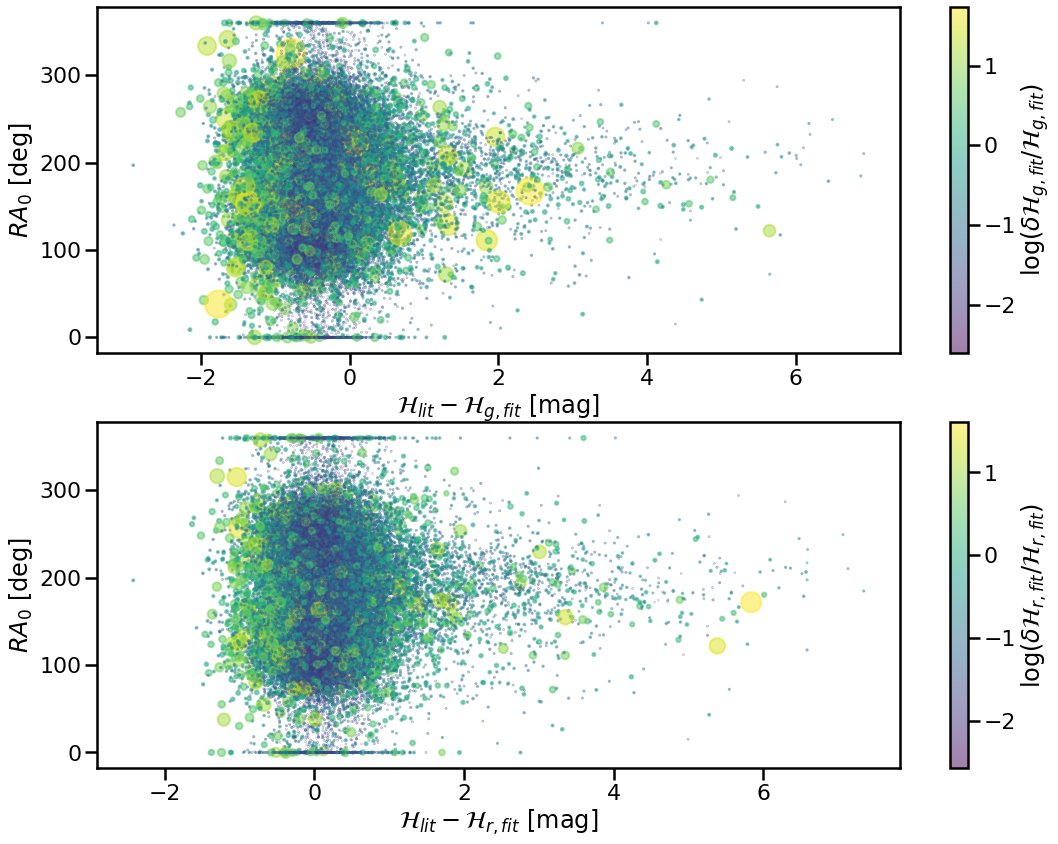

In [61]:
figure, ax = plt.subplots(2, 1, figsize=(18, 14))

for index, filt in enumerate(filters.values()):
    cond = data['dH_{}'.format(filt)] < 1e3
#     cond = data['flavor'] == 'gold'
    s = ax[index].scatter(
        data.loc[cond, 'phase_functions.Generic/Johnson.V.H.value'] - data.loc[cond, 'H_{}'.format(filt)], 
        data.loc[cond, 'RA0'], 
        alpha=0.5,
        c=np.log10(data.loc[cond, 'dH_{}'.format(filt)]/data.loc[cond, 'H_{}'.format(filt)]),
        s=data.loc[cond, 'dH_{}'.format(filt)]
    )
    cb = fig.colorbar(s, ax=ax[index])
    cb.set_label(r'$\log ( \delta \mathcal{{H}}_{{{}, fit}} / \mathcal{{H}}_{{{}, fit}} )$'.format(filt, filt))
    ax[index].set_xlabel(r'$\mathcal{{H}}_{{lit}} - \mathcal{{H}}_{{{}, fit}}$ [mag]'.format(filt))
    ax[index].set_ylabel('$RA_0$ [deg]')
figure.savefig('plots/dh_ra0.png', facecolor='white', dpi=150)
plt.show()

High uncertainty on H is concentrated along RA0 = (0, 180, 360) which are the boundaries and starting point of the parameter space... clear sign that the fit did not converge in those cases :-)

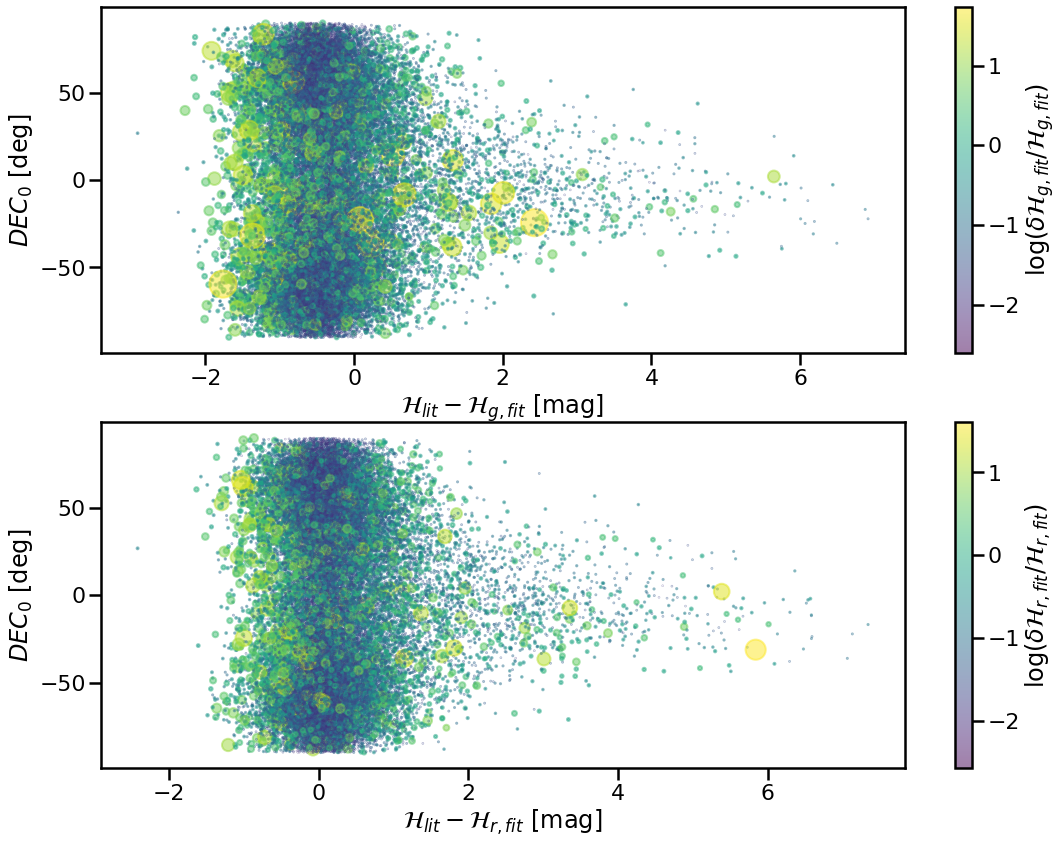

In [62]:
figure, ax = plt.subplots(2, 1, figsize=(18, 14))

for index, filt in enumerate(filters.values()):
    cond = data['dH_{}'.format(filt)] < 1e3
#     cond = data['flavor'] == 'gold'
    s = ax[index].scatter(
        data.loc[cond, 'phase_functions.Generic/Johnson.V.H.value'] - data.loc[cond, 'H_{}'.format(filt)], 
        data.loc[cond, 'DEC0'], 
        alpha=0.5,
        c=np.log10(data.loc[cond, 'dH_{}'.format(filt)]/data.loc[cond, 'H_{}'.format(filt)]),
        s=data.loc[cond, 'dH_{}'.format(filt)]
    )
    cb = fig.colorbar(s, ax=ax[index])
    cb.set_label(r'$\log ( \delta \mathcal{{H}}_{{{}, fit}} / \mathcal{{H}}_{{{}, fit}} )$'.format(filt, filt))
    ax[index].set_xlabel(r'$\mathcal{{H}}_{{lit}} - \mathcal{{H}}_{{{}, fit}}$ [mag]'.format(filt))
    ax[index].set_ylabel('$DEC_0$ [deg]')
figure.savefig('plots/dh_dec0.png', facecolor='white', dpi=150)
plt.show()

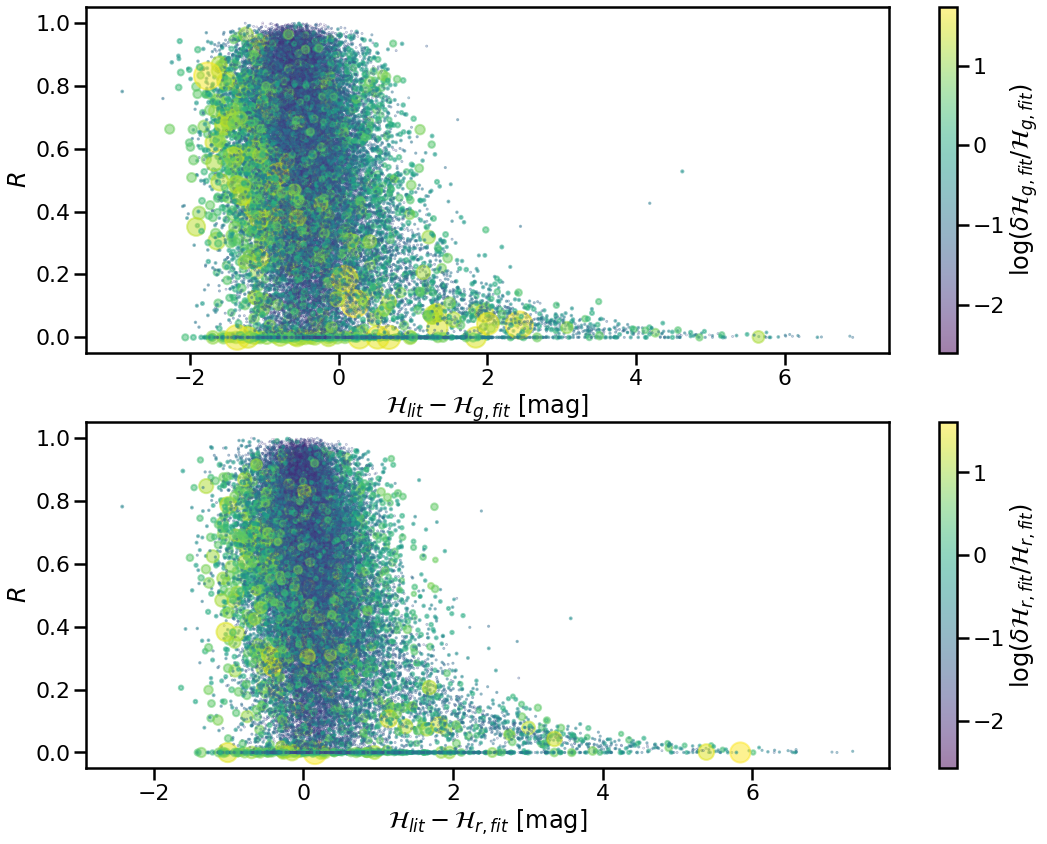

In [63]:
figure, ax = plt.subplots(2, 1, figsize=(18, 14))

for index, filt in enumerate(filters.values()):
    cond = data['dH_{}'.format(filt)] < 1e3
#     cond = data['flavor'] == 'gold'
    s = ax[index].scatter(
        data.loc[cond, 'phase_functions.Generic/Johnson.V.H.value'] - data.loc[cond, 'H_{}'.format(filt)], 
        data.loc[cond, 'R'], 
        alpha=0.5,
        c=np.log10(data.loc[cond, 'dH_{}'.format(filt)]/data.loc[cond, 'H_{}'.format(filt)]),
        s=data.loc[cond, 'dH_{}'.format(filt)]
    )
    cb = fig.colorbar(s, ax=ax[index])
    cb.set_label(r'$\log ( \delta \mathcal{{H}}_{{{}, fit}} / \mathcal{{H}}_{{{}, fit}} )$'.format(filt, filt))
    ax[index].set_xlabel(r'$\mathcal{{H}}_{{lit}} - \mathcal{{H}}_{{{}, fit}}$ [mag]'.format(filt))
    ax[index].set_ylabel('$R$')
figure.savefig('plots/dh_R.png', facecolor='white', dpi=150)
plt.show()

Let's look at the RMS as a function of the number of oppositions

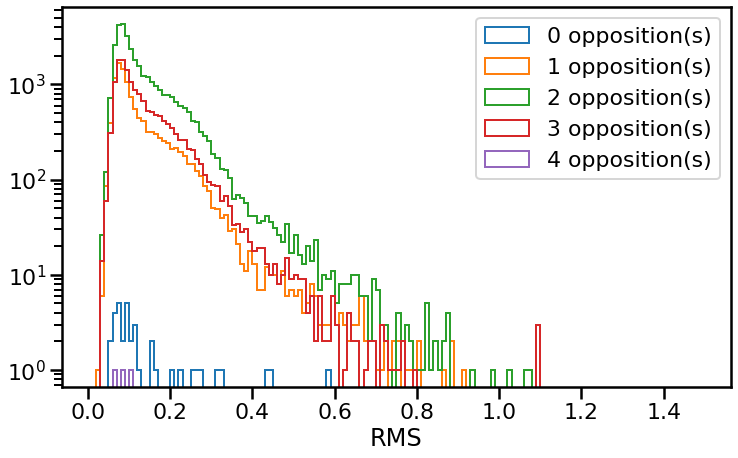

In [64]:
fig = plt.figure(figsize=(12, 7))

uopps = np.unique(data['noppositions'].values)

bins = np.arange(0.01, 1.5, 0.01)

for uopp in uopps:
    cond = data['noppositions'] == uopp
    cond *= data['flavor'].apply(lambda x: x in ['gold', 'silver', 'bronze'])
    plt.hist(data.loc[cond, 'rms'], bins=bins, histtype='step', label='{} opposition(s)'.format(int(uopp)))
plt.yscale('log')
plt.xlabel('RMS')
plt.legend();

Hum that is not so clear...

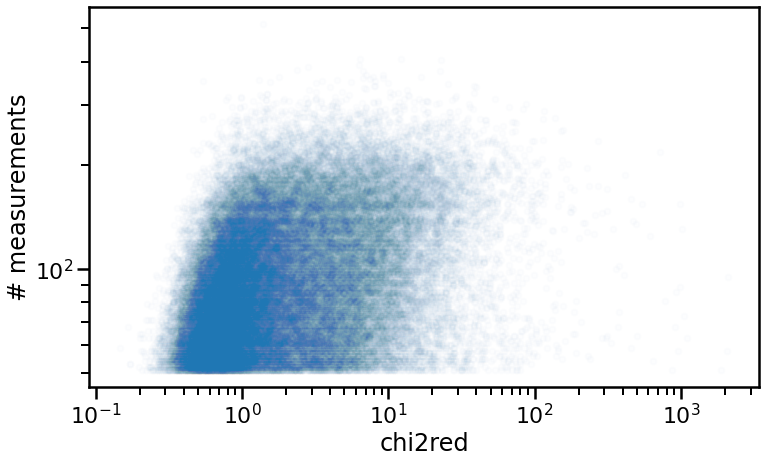

In [65]:
fig = plt.figure(figsize=(12, 7))

cond = data['flavor'].apply(lambda x: x in ['gold', 'silver', 'bronze'])
plt.scatter(data.loc[cond, 'chi2red'], data.loc[cond, 'nmeasurements'], alpha=0.01, marker='.')
plt.xlabel('chi2red')
plt.ylabel('# measurements')
plt.xscale('log')
plt.yscale('log')